# Global Visualization of the Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import ast

import re
from collections import Counter
from PIL import Image

%matplotlib inline

restaurants = pd.read_csv('datasets/clean_ta_dataset.csv', encoding='utf8', index_col=0)

restaurants.head()

,city,cuisine_style,ranking,rating,price_range,reviews_number,reviews,url_ta,id_ta
name,,,,,,,,,
McDonald's,Zurich,['American'],1540.0,2.5,$,11,"[['Hangover', 'Most expensive McDonalds in the...",https://www.tripadvisor.com/Restaurant_Review-...,d8796498
Burgstein`s Gasthaus Penalty,Zurich,"['Austrian', 'Swiss', 'International', 'Europe...",1541.0,5.0,$$ - $$$,2,"[[], []]",https://www.tripadvisor.com/Restaurant_Review-...,d12652562
Yumi Hana,Zurich,"['Korean', 'Japanese']",1542.0,3.0,$$ - $$$,50,[['What once was a 5 points Restaurant is clo....,https://www.tripadvisor.com/Restaurant_Review-...,d2070374
Peking Garden,Zurich,"['Chinese', 'Asian']",1544.0,2.5,$,41,"[['Just if no other choice!', 'Ok Chinese food...",https://www.tripadvisor.com/Restaurant_Review-...,d2005395
Long Huang,Zurich,"['Chinese', 'Vietnamese']",1545.0,2.5,$$ - $$$,14,"[['Good', 'As the name implies, long wait and ...",https://www.tripadvisor.com/Restaurant_Review-...,d11963037


## Number of Restaurants per city


 Sorted by number of restaurants 

London        11795
Paris          9398
Barcelona      5185
Rome           4701
Madrid         4692
Milan          3767
Berlin         3510
Prague         2581
Amsterdam      2476
Lisbon         2425
Vienna         2061
Brussels       2047
Munich         1704
Budapest       1680
Dublin         1471
Edinburgh      1413
Lyon           1389
Stockholm      1380
Copenhagen     1295
Warsaw         1278
Hamburg        1215
Athens         1206
Zurich         1097
Oporto         1036
Geneva          962
Krakow          848
Helsinki        763
Oslo            756
Luxembourg      441
Bratislava      439
Ljubljana       323
Name: city, dtype: int64

 Total number of restaurants: 75334


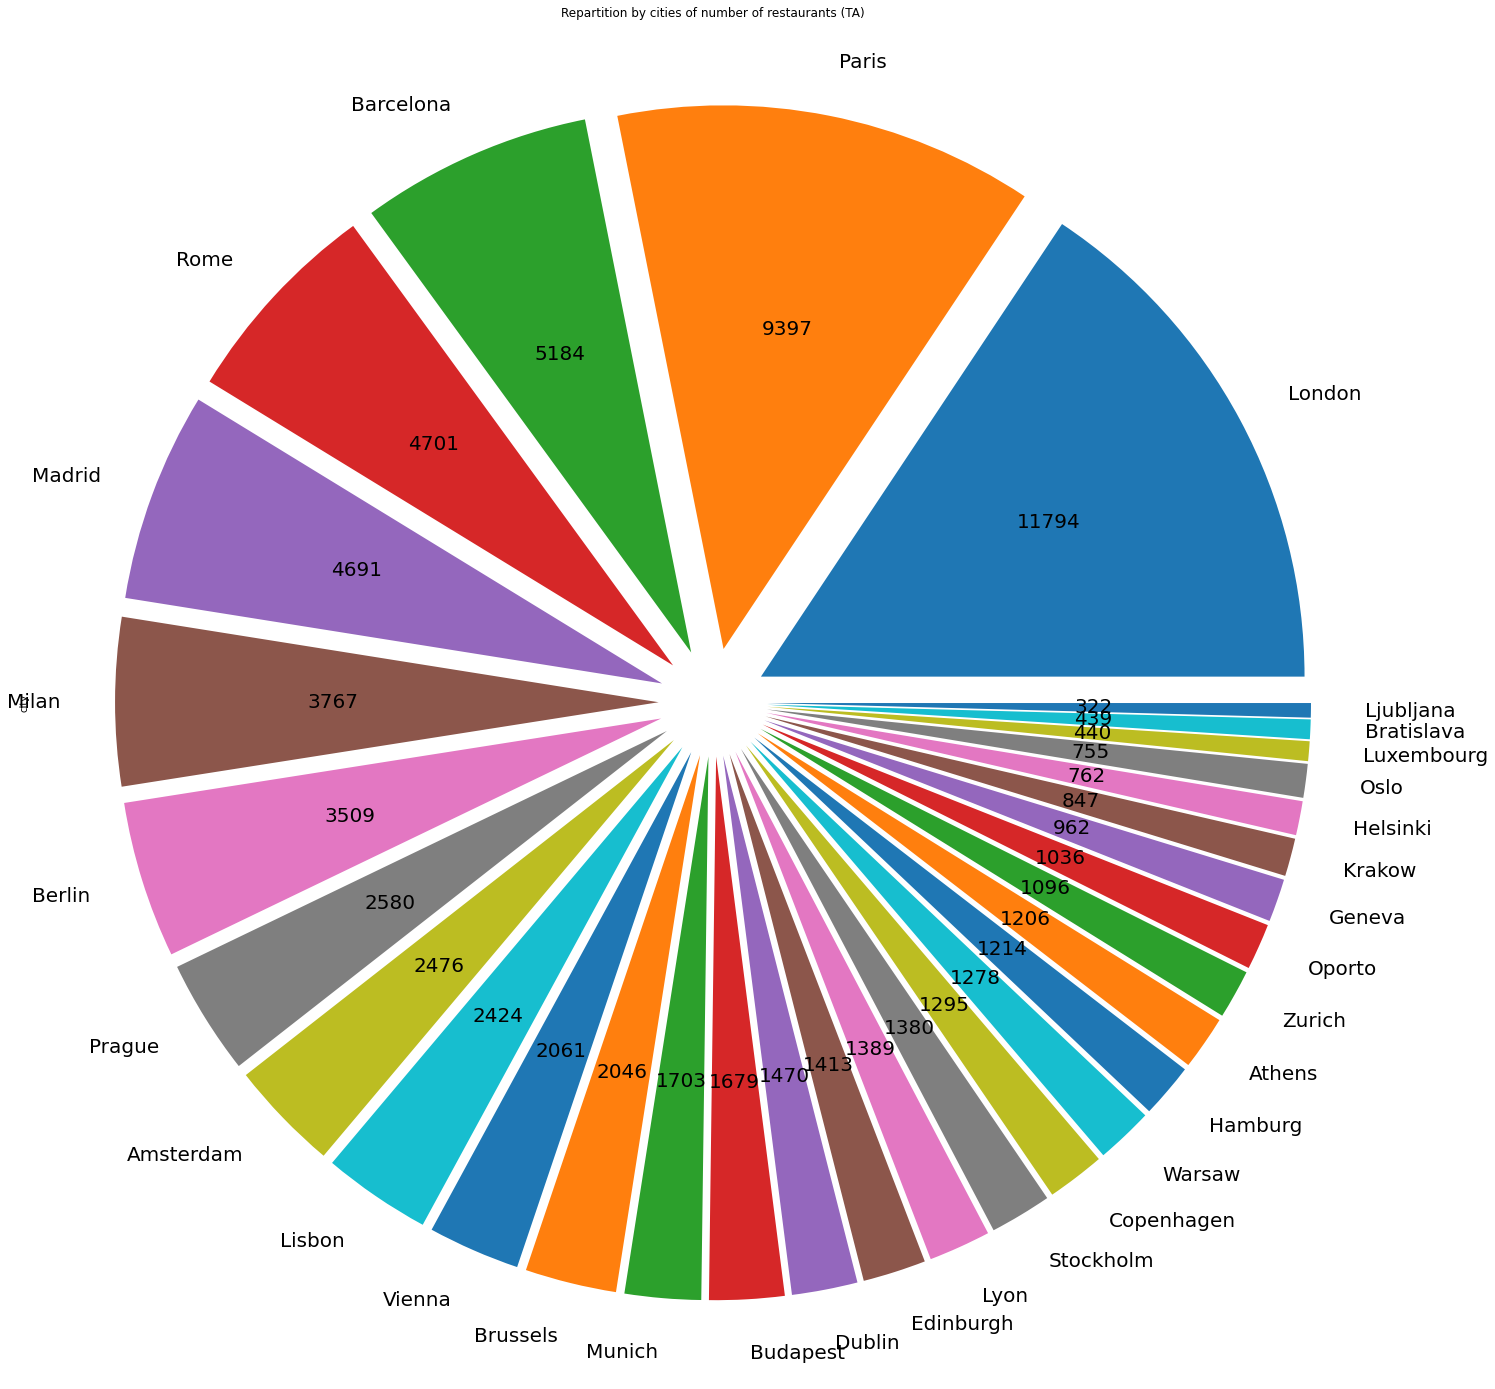

In [41]:
#Cities sorted by number of restaurants
global_number = restaurants['city'].value_counts(dropna=False)
print("\n Sorted by number of restaurants \n")
print(global_number)
total_rest = global_number.sum()
print("\n Total number of restaurants: {}".format(total_rest))

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
explode = [0.1 for i in global_number]
global_number.plot(kind='pie', figsize=(25, 25), explode=explode, fontsize=20, autopct=lambda v: int(v*total_rest/100),
                        title="Repartition by cities of number of restaurants (TA)")
plt.savefig('figures/restaurants_repartition_by_city.png')
plt.show()

## Number of Restaurants per inhabitant and km2

In [42]:
#Wikipedia: city population
pop_dict = {'London': 8673713, 'Paris': 2220445, 'Madrid':  3141991, 'Barcelona': 1620809, 'Berlin': 3520031,
                'Milan': 1368590, 'Rome': 2877215, 'Prague': 1280508, 'Lisbon': 545245, 'Vienna': 1840573, 'Amsterdam':840486,
                'Munich': 1548319, 'Hamburg': 1787408, 'Brussels': 1202953, 'Stockholm': 1515017, 'Budapest': 1733685,
                'Warsaw': 1726581, 'Copenhagen':  602481, 'Dublin': 5276120, 'Lyon': 513275, 'Athens': 664046,
                'Edinburgh': 482640, 'Zurich': 402762, 'Oporto': 237591, 'Geneva': 201813, 'Krakow': 758334, 
                'Helsinki': 642045, 'Oslo': 623966, 'Bratislava': 455800, 'Luxembourg': 115227, 'Ljubljana':280278}

#Wikipedia: Area of the city in km²
area_dict = {'London': 1575, 'Paris': 105.4, 'Madrid':  608, 'Barcelona': 100.4, 'Berlin': 3891.9,
                'Milan': 182, 'Rome': 1285.3, 'Prague': 496, 'Lisbon': 83.84, 'Vienna': 414.9, 'Amsterdam':219.3,
                'Munich': 310.4, 'Hamburg': 755.3, 'Brussels': 161.38, 'Stockholm': 414, 'Budapest': 525.1,
                'Warsaw': 517.24, 'Copenhagen':  88.25, 'Dublin': 115, 'Lyon': 47.9, 'Athens': 38,
                'Edinburgh': 259, 'Zurich': 87.9, 'Oporto': 41.3, 'Geneva': 15.9, 'Krakow': 326.8, 
                'Helsinki': 213.75, 'Oslo': 454, 'Bratislava': 367.6, 'Luxembourg': 51.7, 'Ljubljana': 275}

#Dataframe creation
pop_rest_df = pd.DataFrame()
pop_rest_df['Restaurants'] = global_number
pop_rest_df['Population'] = pd.DataFrame([pop_dict]).T
pop_rest_df['Rest/1000 Inhabitants'] = 1000 * pop_rest_df['Restaurants'] / pop_rest_df['Population']
pop_rest_df['Area'] = pd.DataFrame([area_dict]).T
pop_rest_df['Rest/km²'] = pop_rest_df['Restaurants'] / pop_rest_df['Area']
pop_rest_df = pop_rest_df.sort_values('Rest/1000 Inhabitants', ascending=False)

print(pop_rest_df.head(10), '\n')
print(pop_rest_df.describe())

            Restaurants  Population  Rest/1000 Inhabitants    Area   Rest/km²
Geneva              962      201813               4.766789   15.90  60.503145
Lisbon             2425      545245               4.447542   83.84  28.924141
Oporto             1036      237591               4.360435   41.30  25.084746
Paris              9398     2220445               4.232485  105.40  89.165085
Luxembourg          441      115227               3.827228   51.70   8.529981
Barcelona          5185     1620809               3.199020  100.40  51.643426
Amsterdam          2476      840486               2.945915  219.30  11.290470
Edinburgh          1413      482640               2.927648  259.00   5.455598
Milan              3767     1368590               2.752468  182.00  20.697802
Zurich             1097      402762               2.723693   87.90  12.480091 

        Restaurants    Population  Rest/1000 Inhabitants         Area  \
count     31.000000  3.100000e+01              31.000000    31.0000

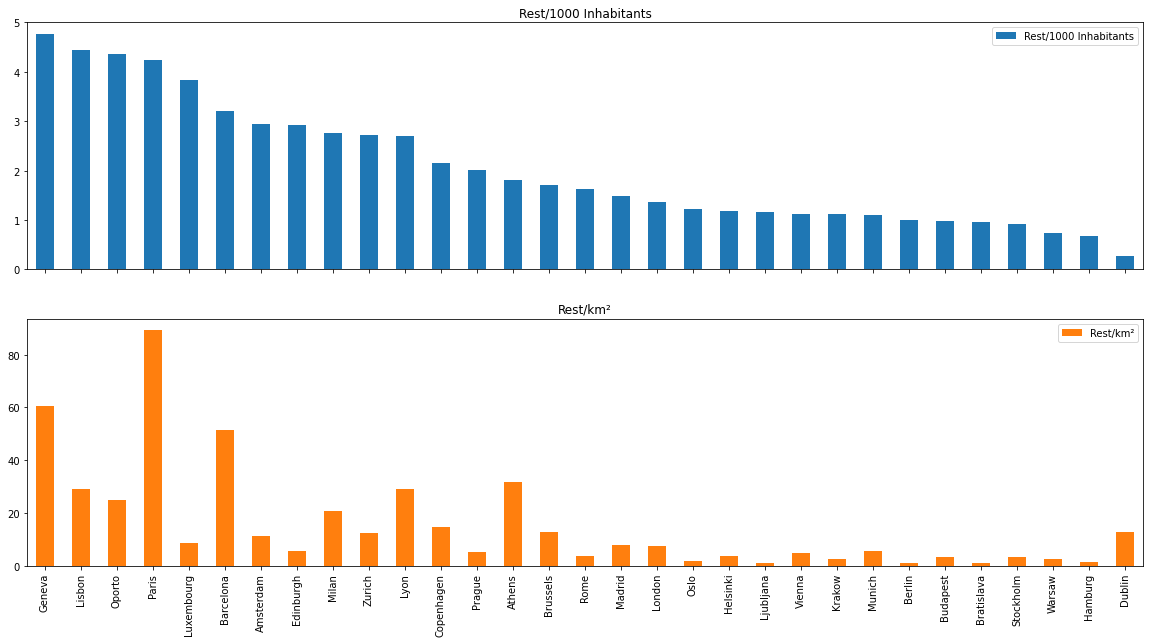

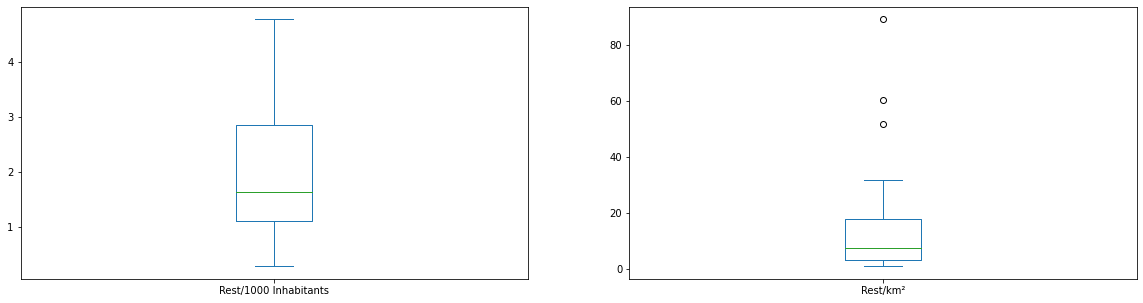

In [43]:
#Visualization with bar plot
pop_rest_df.plot(kind='bar', subplots=True, y=['Rest/1000 Inhabitants', 'Rest/km²'], figsize=(20,10))
plt.savefig('figures/densities.png')
plt.show()

#Visualization with boxplot:
pop_rest_df.plot(kind='box', subplots=True, y=['Rest/1000 Inhabitants', 'Rest/km²'], figsize=(20,5))
plt.savefig('figures/densities_box.png')
plt.show()

## Cuisine Style Analysis analysis

In [44]:
cuisine_data = restaurants[['cuisine_style', 'city']]

#Counting function to parse the cuisine styles lists
def cuisine_count(liste):
    cuisine_dict = {'Unknown': 0}
    for styles in liste:
        if styles is not np.nan:
            styles = ast.literal_eval(styles)  #recognize items as lists instead of string objects
            for style in styles:  #iterates over each cuisine style in the list
                if style in cuisine_dict:
                    cuisine_dict[style] += 1
                else :
                    cuisine_dict[style] = 1
        else:
            cuisine_dict['Unknown'] +=1
    return(cuisine_dict)
            
#Global cuisine styles count
global_cuisine_count = cuisine_count(cuisine_data['cuisine_style'])
print("Total number of different cuisine styles:", len(global_cuisine_count))
print(global_cuisine_count)

#Count for each city and dataframe building
cuisine_count_df = pd.DataFrame()
city_number_styles = pd.Series()  # Initialize the df and series to avoid unwanted concatenation
for city in global_number.index:
    city_cuisine = cuisine_count(cuisine_data[cuisine_data['city'] == city]['cuisine_style'])
    city_number_styles = pd.concat([city_number_styles, pd.Series(data=len(city_cuisine), index=[city])]) #number of styles for the city in a series
    city_cuisine = pd.DataFrame(city_cuisine, index=[city]) #row for the city
    cuisine_count_df = pd.concat([cuisine_count_df, city_cuisine])
cuisine_count_df = cuisine_count_df.fillna(0)  #Replace NaN by 0
city_number_styles = city_number_styles.sort_values(ascending=False) #sorting values for visualization
print(cuisine_count_df.head(5))
print(city_number_styles)

#Statistical exploration
print(cuisine_count_df.describe())

Total number of different cuisine styles: 126
{'Unknown': 0, 'American': 3379, 'Austrian': 945, 'Swiss': 478, 'International': 4089, 'European': 27047, 'Korean': 449, 'Japanese': 3712, 'Chinese': 2713, 'Asian': 8068, 'Vietnamese': 1269, 'Cafe': 5844, 'Vegetarian Friendly': 31935, 'Italian': 15143, 'Sushi': 2900, 'Bar': 8974, 'Delicatessen': 933, 'Pub': 6328, 'Wine Bar': 1939, 'Pizza': 6989, 'Indian': 2476, 'Halal': 1584, 'Mediterranean': 17033, 'Central European': 4058, 'African': 359, 'Ethiopian': 112, 'Contemporary': 1415, 'Healthy': 1570, 'German': 1737, 'Belgian': 727, 'French': 7990, 'Dutch': 786, 'Gluten Free Options': 12066, 'Vegan Options': 12844, 'Indonesian': 139, 'Seafood': 4017, 'Fast Food': 4177, 'British': 4432, 'Tibetan': 64, 'Nepali': 229, 'Barbecue': 1505, 'Steakhouse': 1530, 'Latin': 806, 'Argentinean': 461, 'South American': 932, 'Grill': 1308, 'Thai': 1867, 'Soups': 1493, 'Street Food': 701, 'Diner': 674, 'Lebanese': 757, 'Middle Eastern': 2006, 'Israeli': 190, 'New

/var/folders/_r/29t8d54923b4pl12b1nwq531b09791/T/ipykernel_72933/136161933.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  city_number_styles = pd.Series()  # Initialize the df and series to avoid unwanted concatenation


           Unknown  Cafe  Middle Eastern  Persian  Vegetarian Friendly  \
London           0  1414             642     73.0                 6323   
Paris            0   511             243     14.0                 2828   
Barcelona        0   322              82      2.0                 2019   
Rome             0   198              31      5.0                 2612   
Madrid           0   242              37      4.0                 1377   

           Vegan Options  Gluten Free Options  Italian  Mediterranean  \
London              2758                 3375     1642           1539   
Paris                797                  409     1154            828   
Barcelona           1027                  925      529           2895   
Rome                1173                  952     3683           2267   
Madrid               600                  643      365           1979   

           Seafood  ...  Latvian  Salvadoran  Mongolian  Xinjiang  Yunnan  \
London         352  ...      1.0       

### Visualization for each City

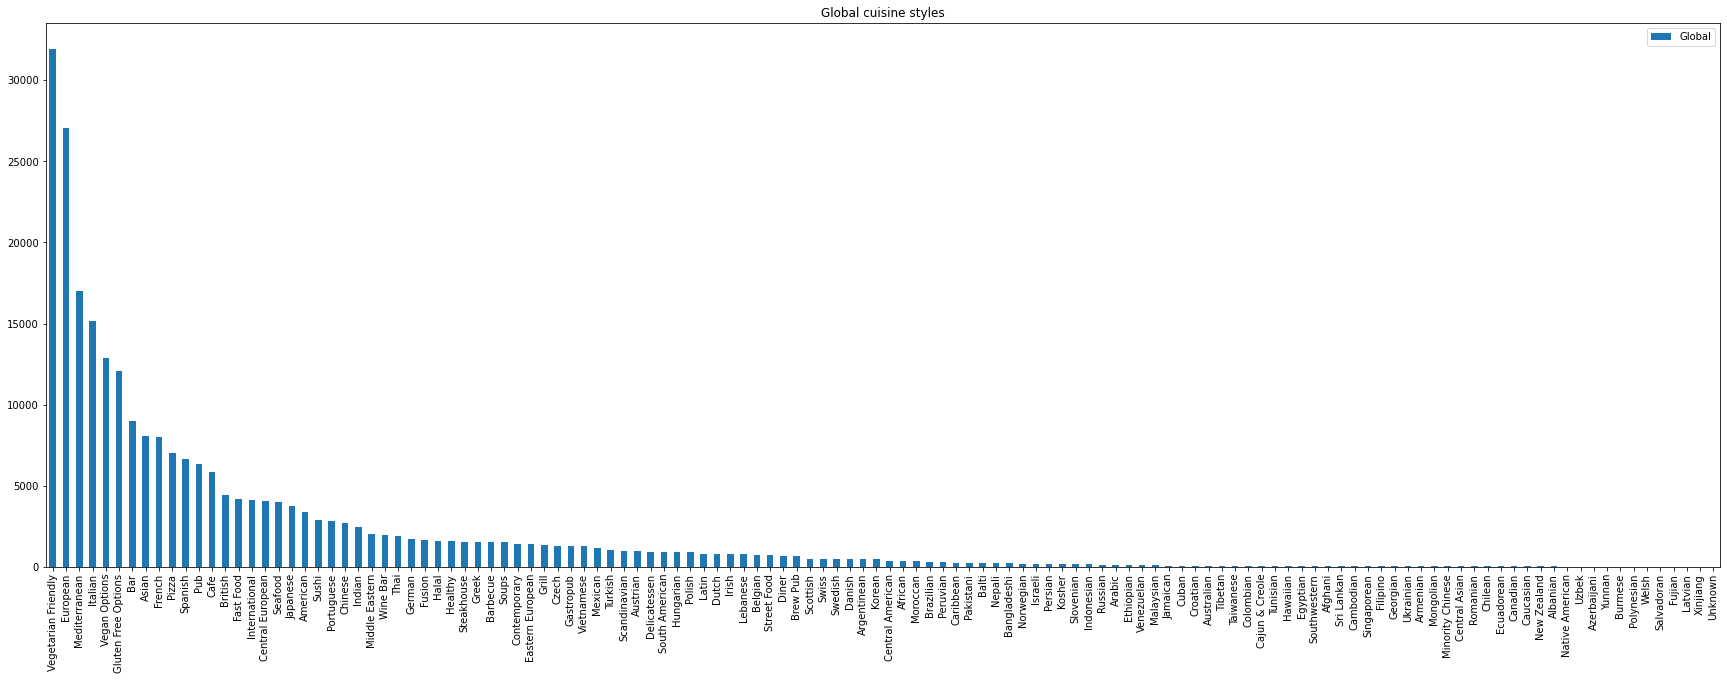

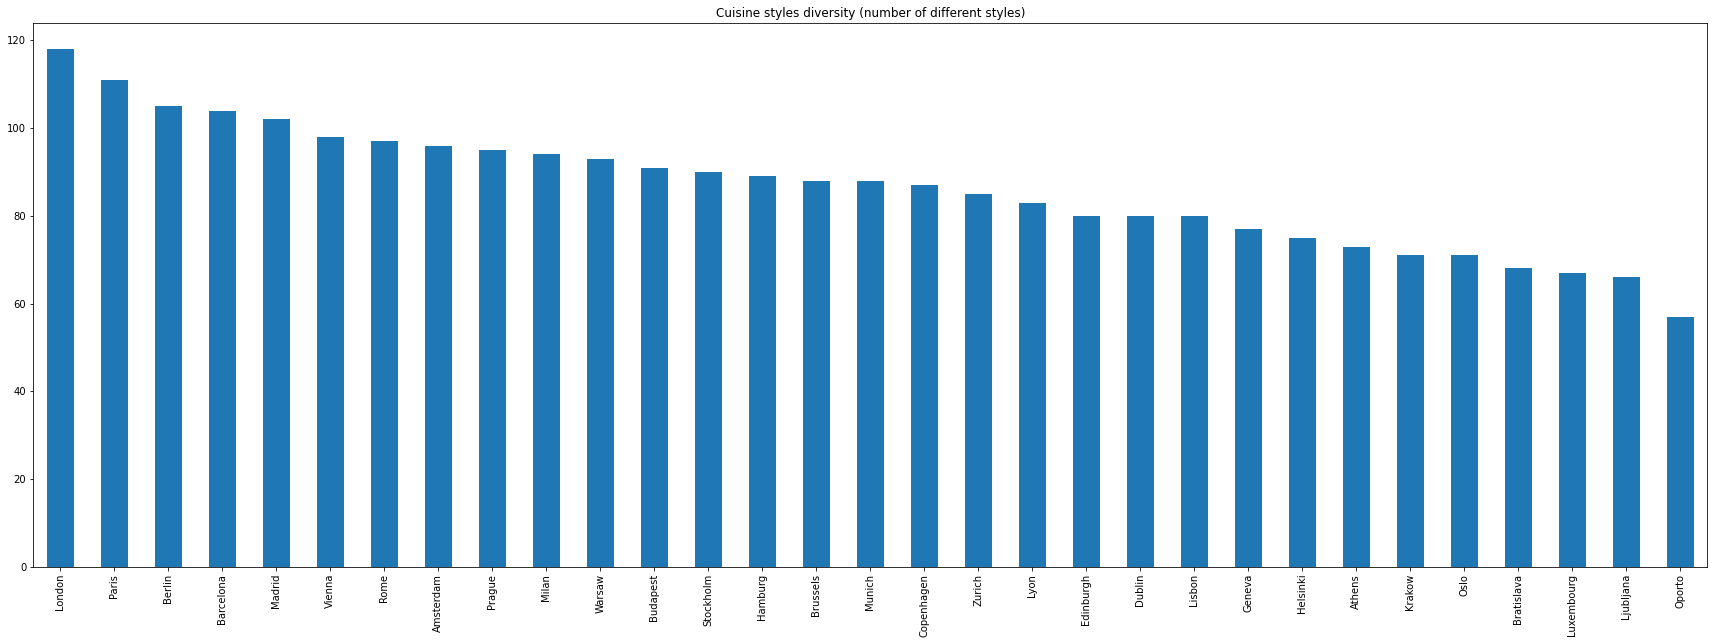

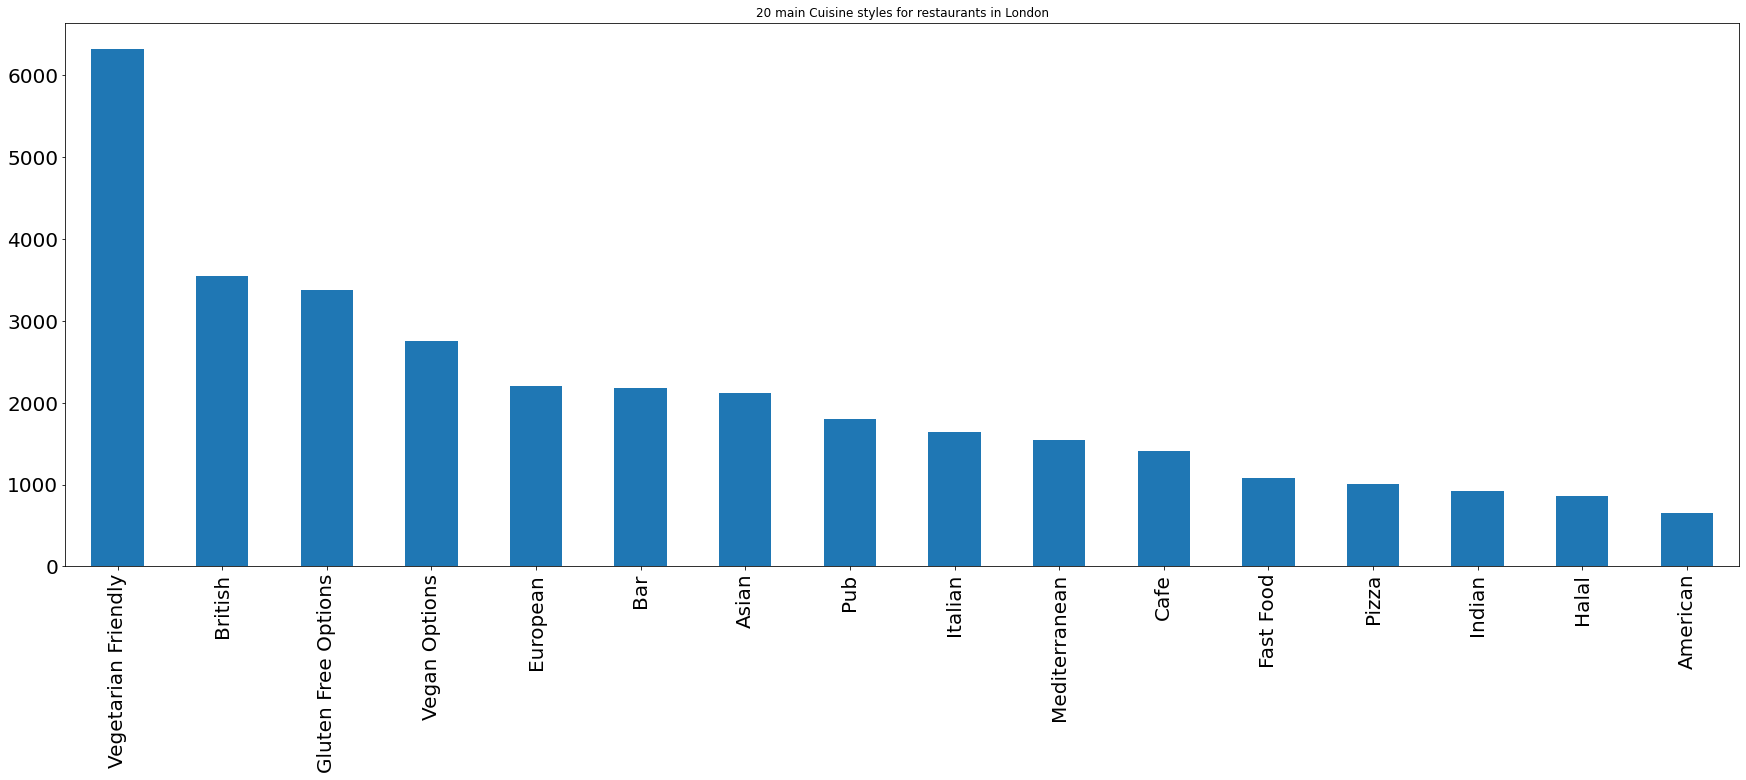

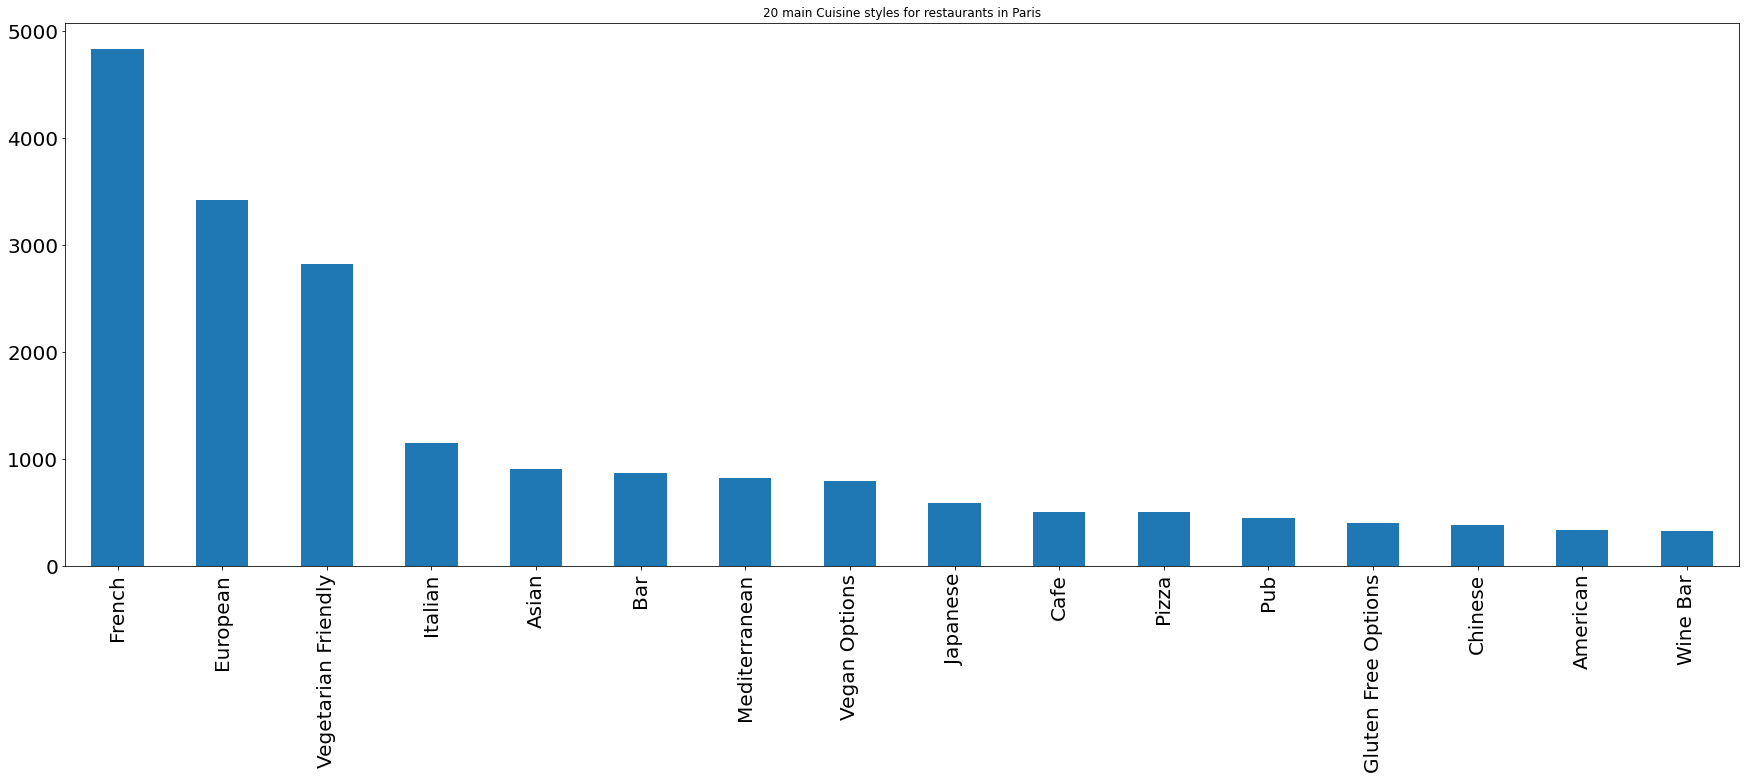

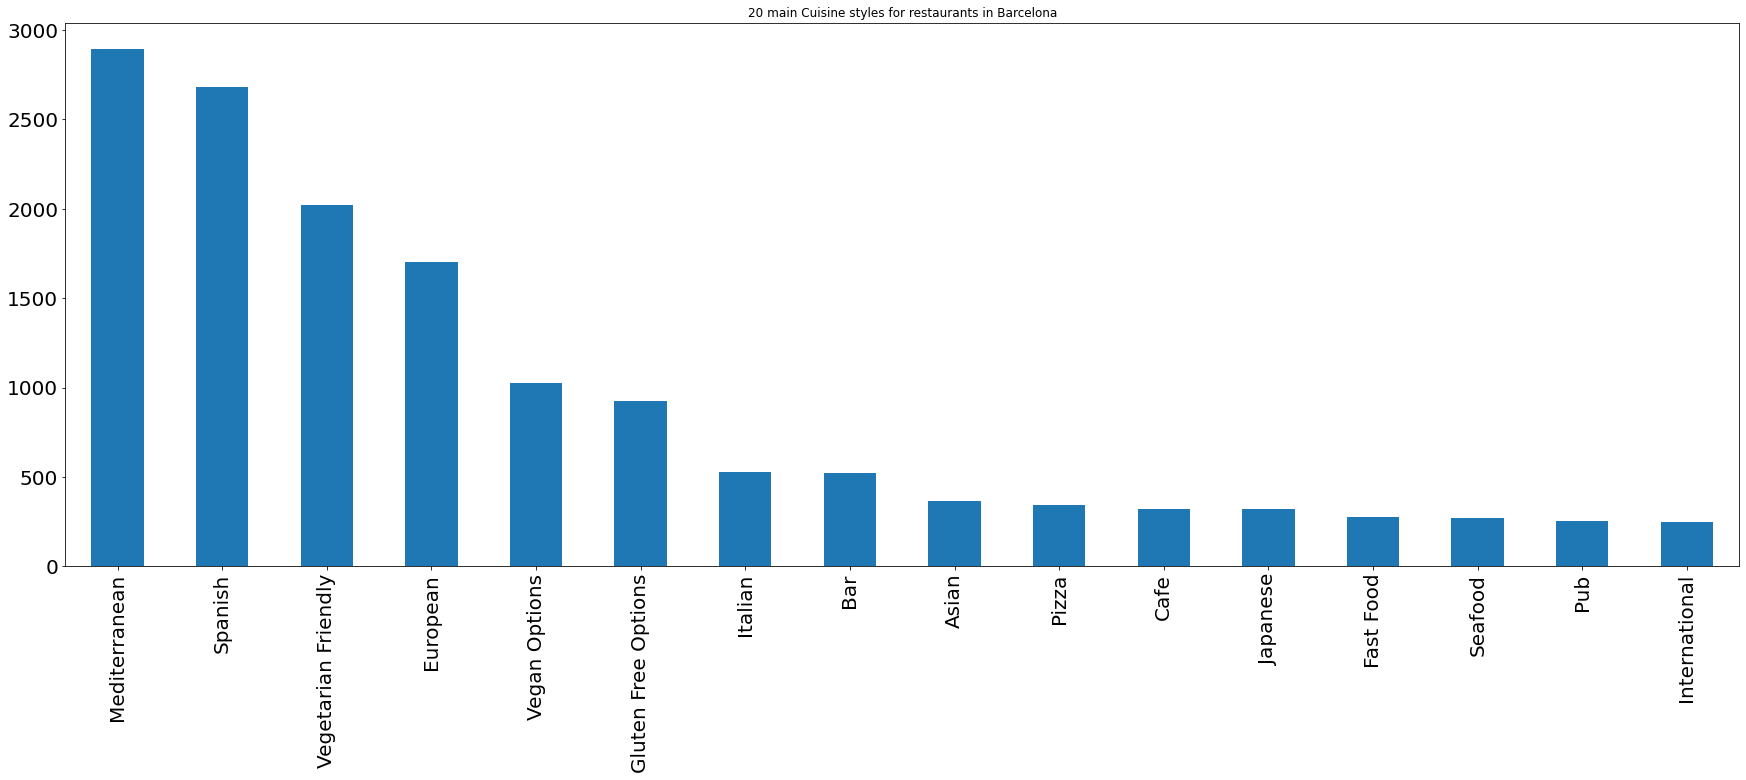

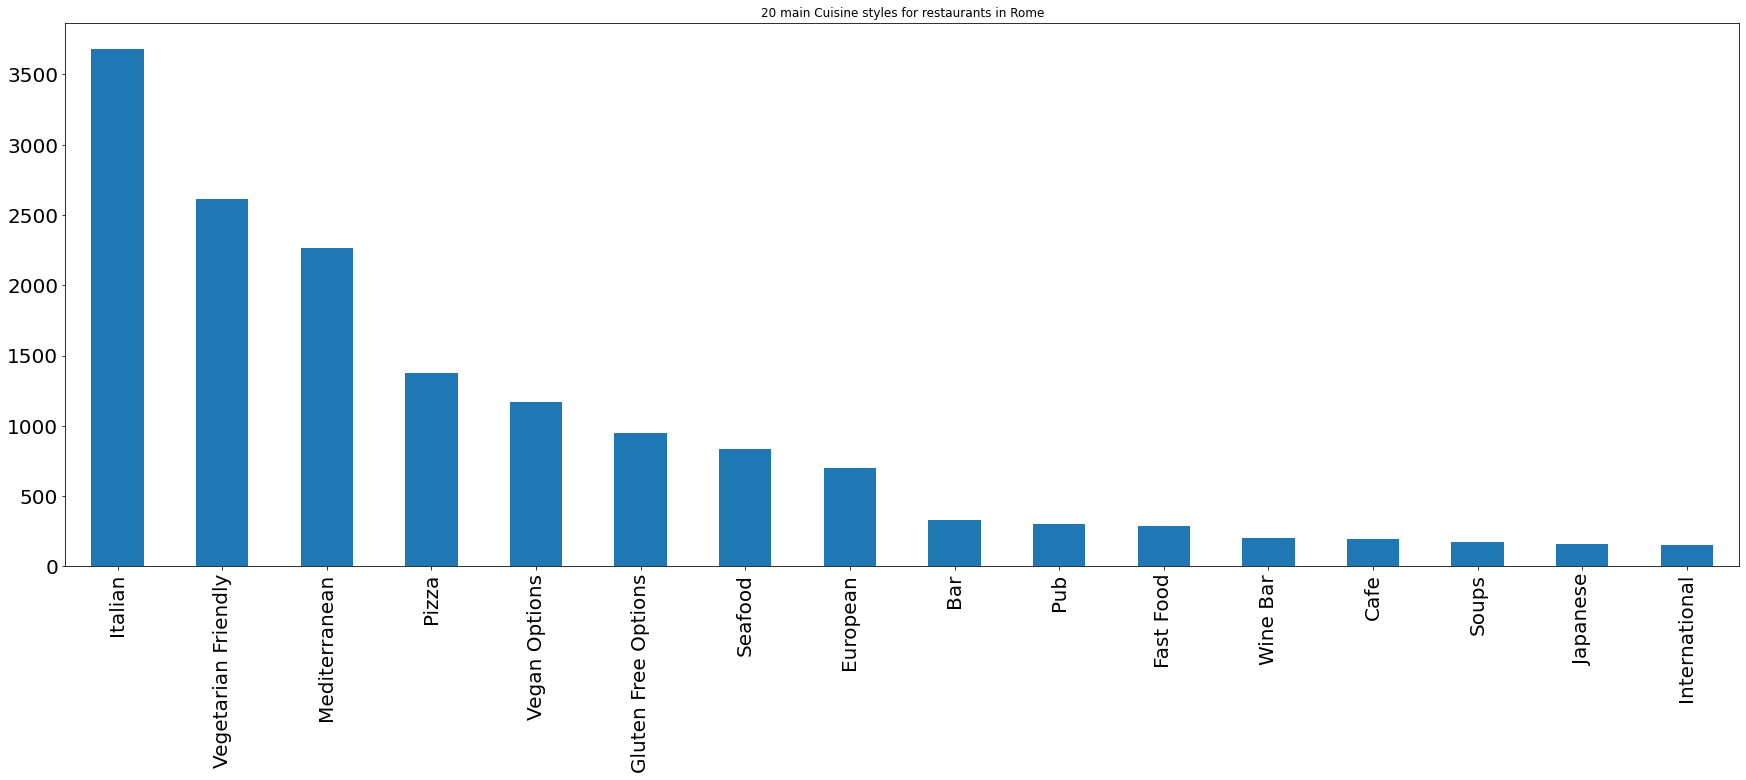

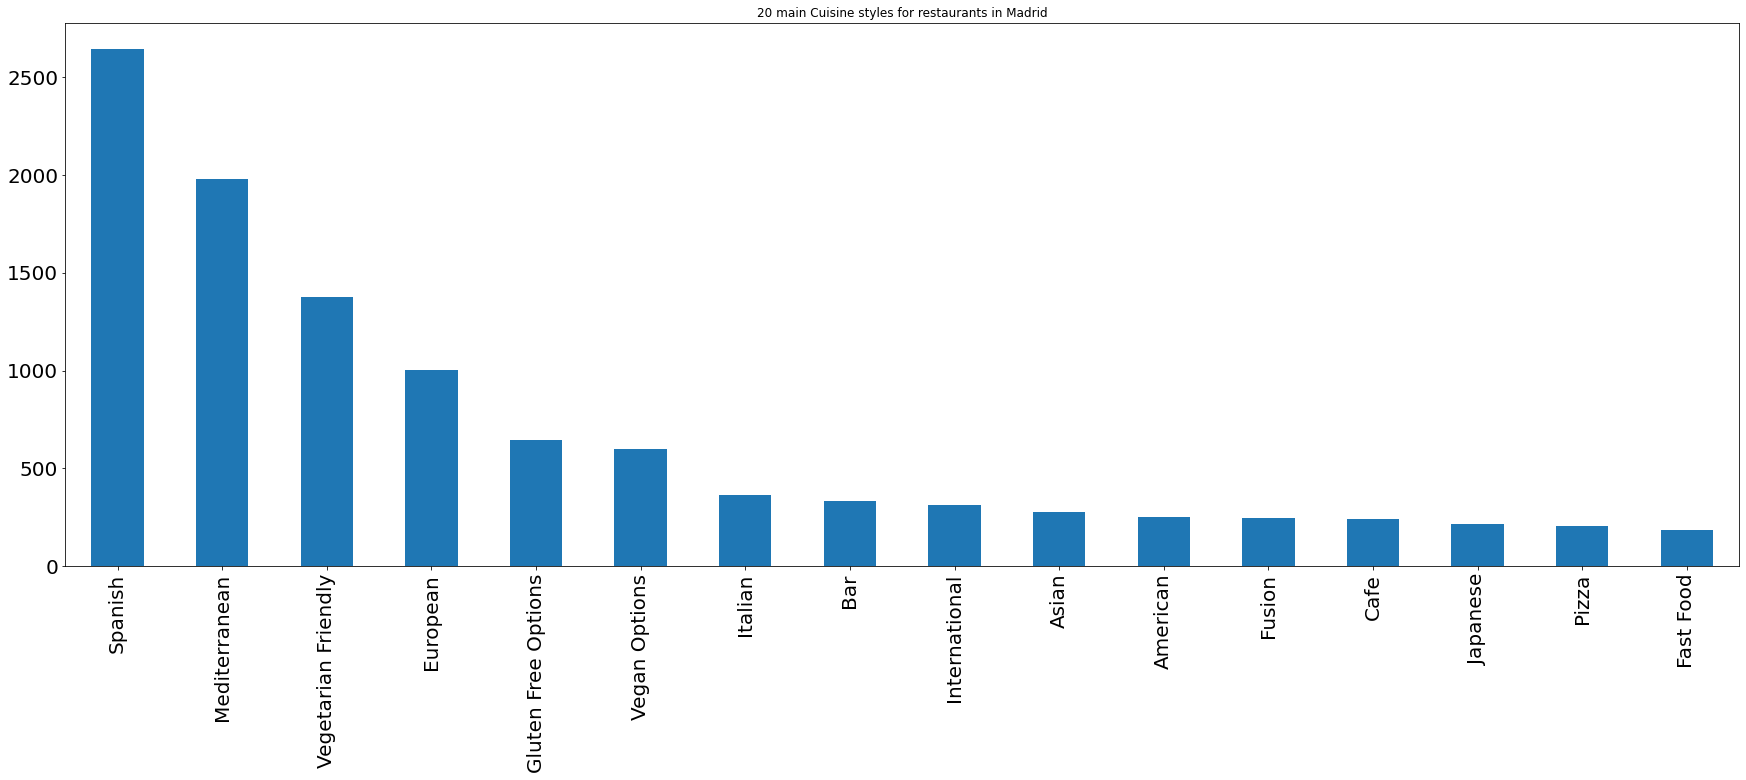

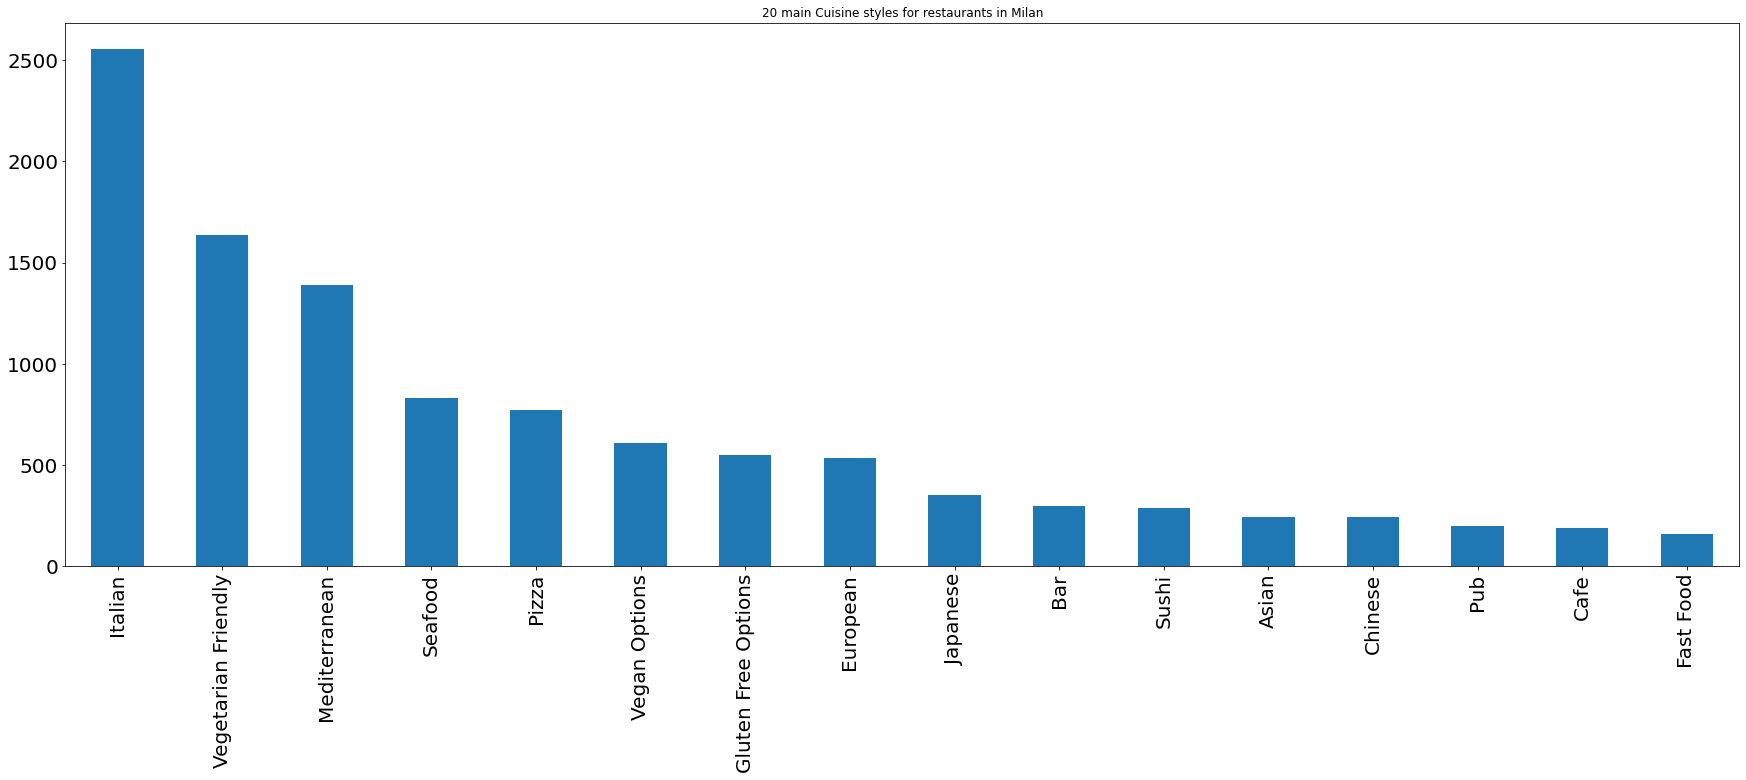

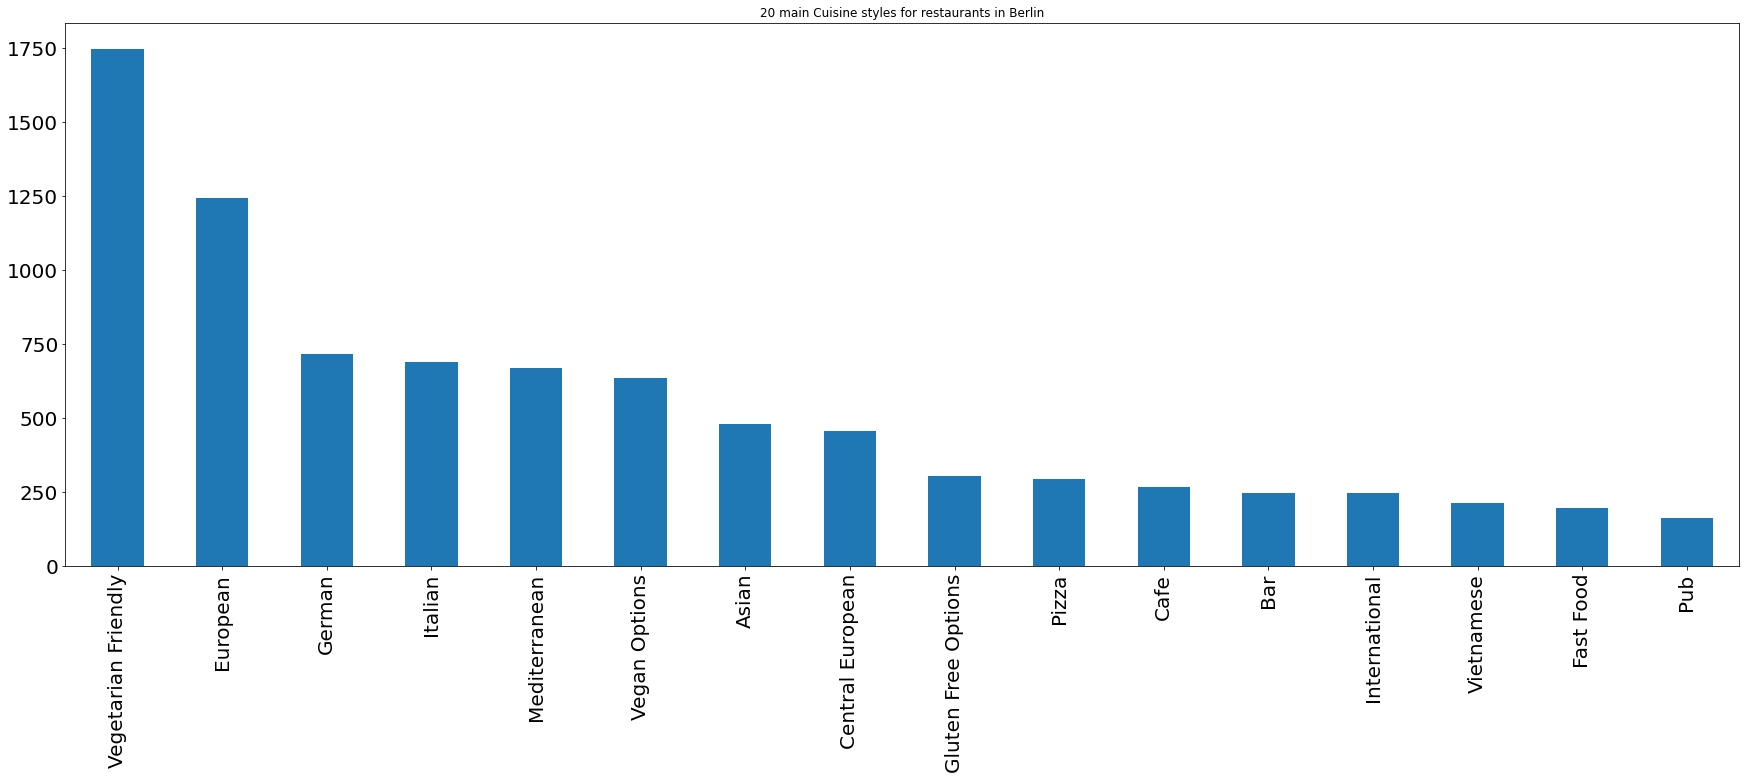

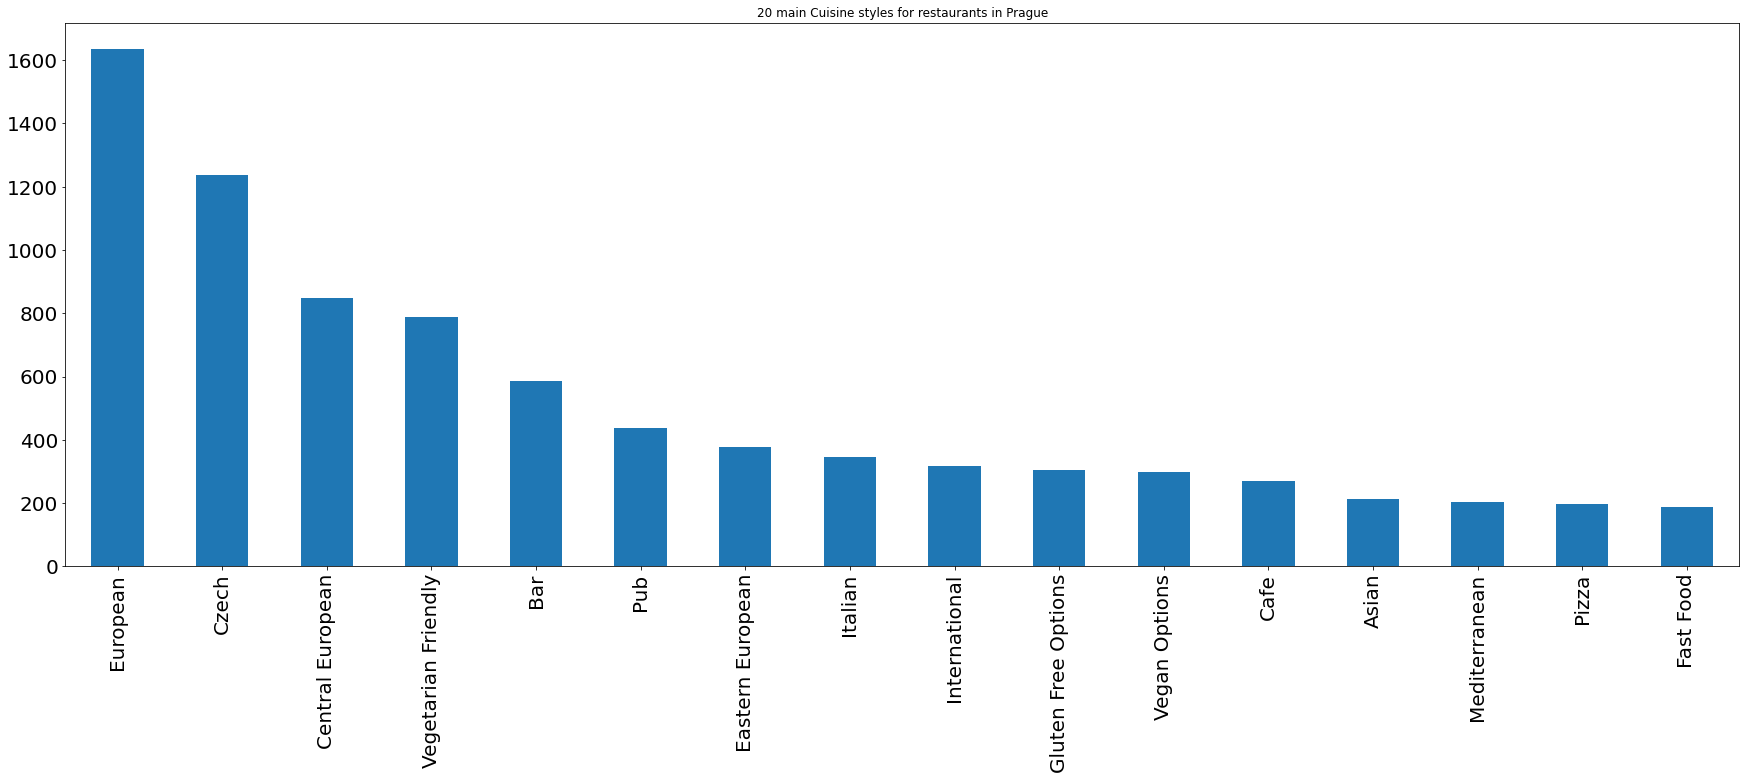

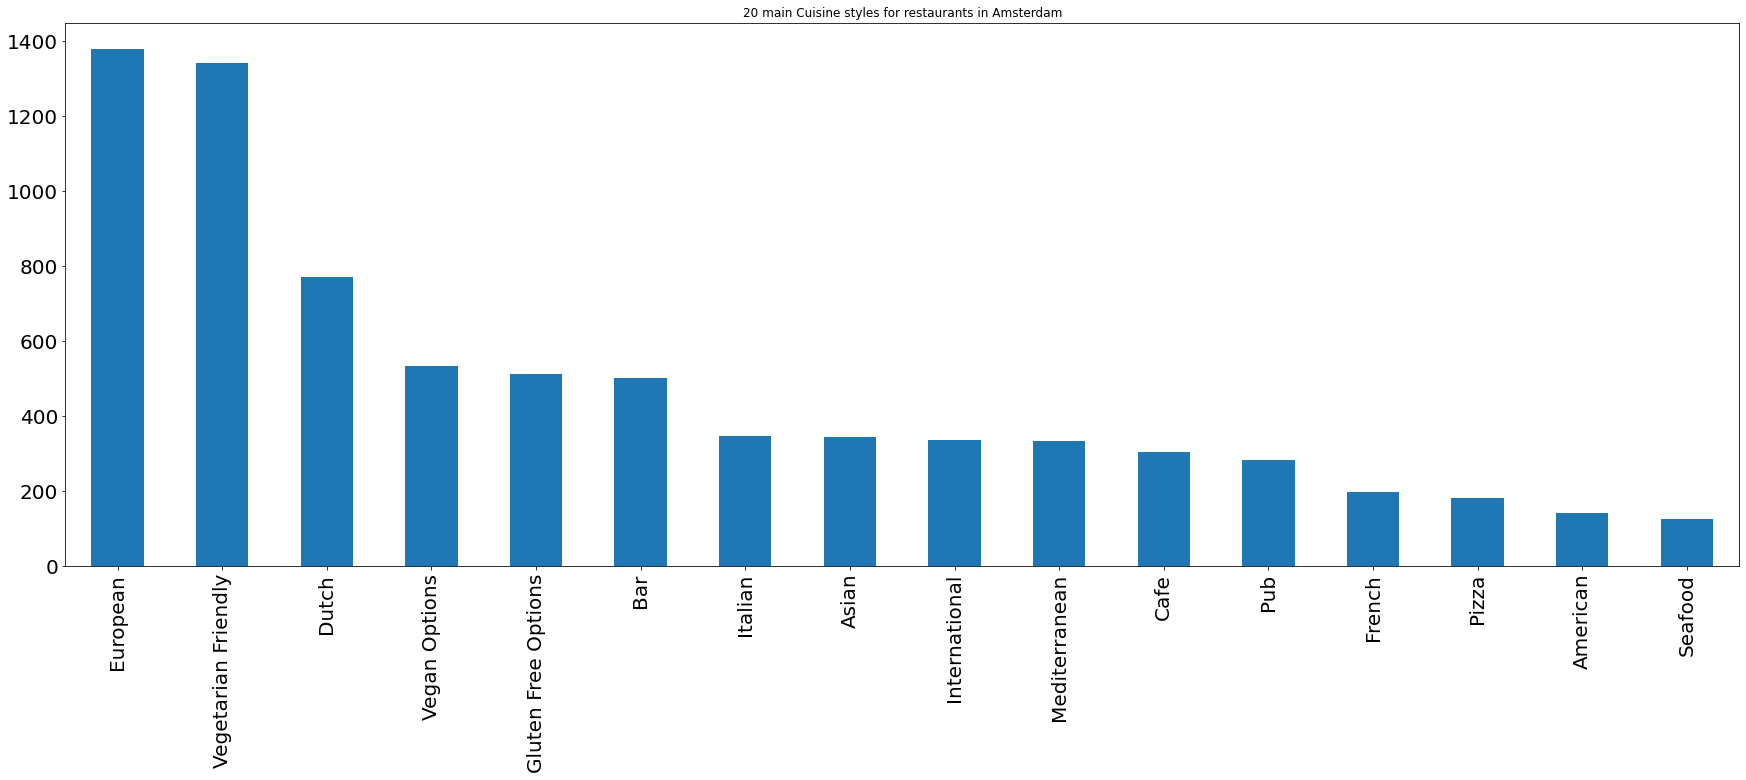

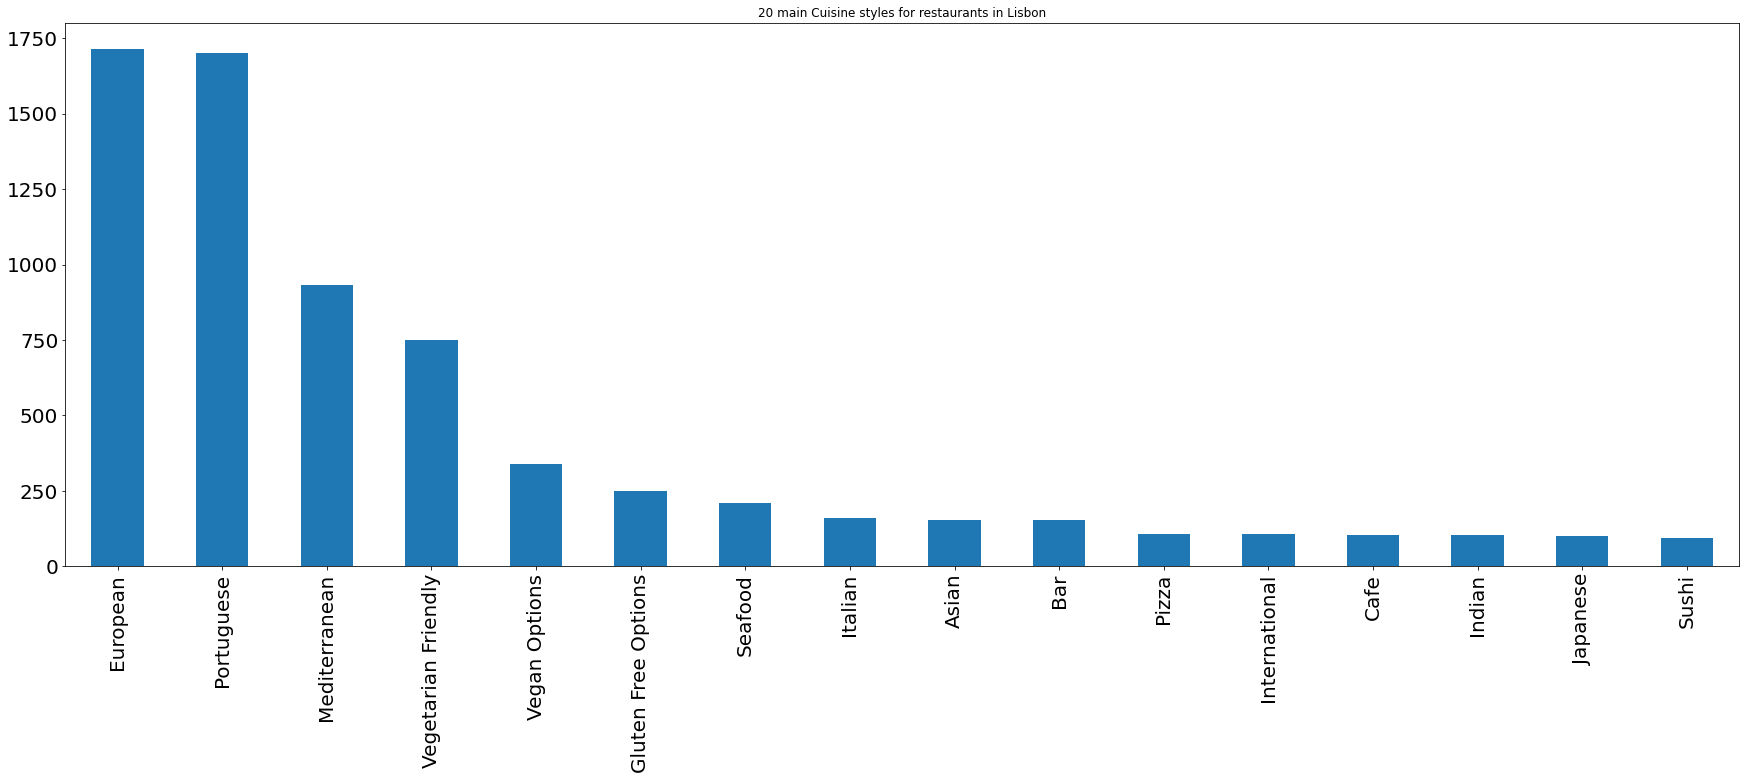

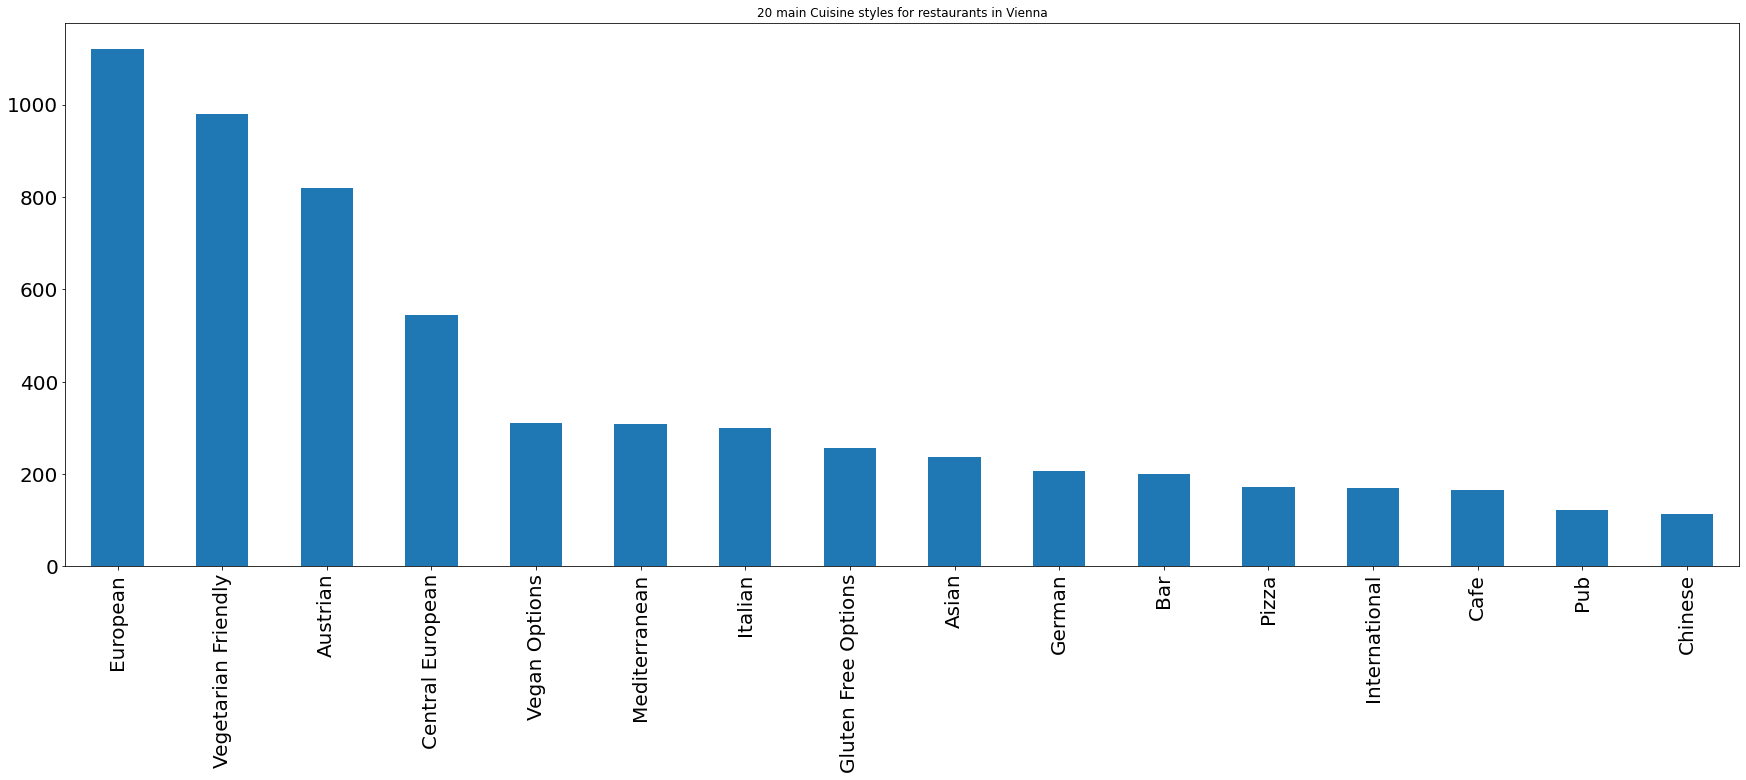

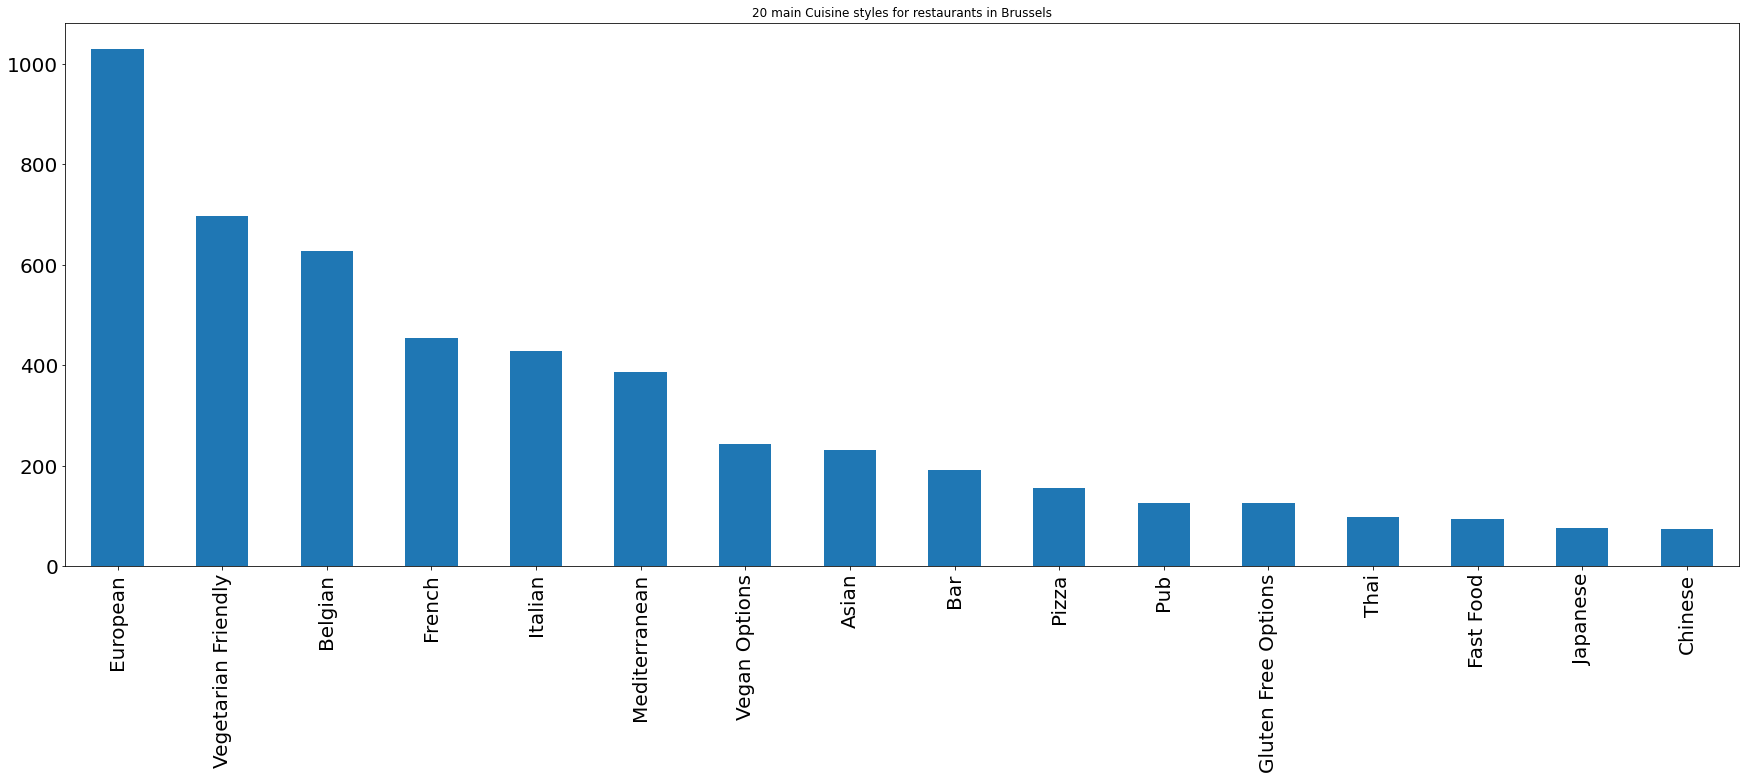

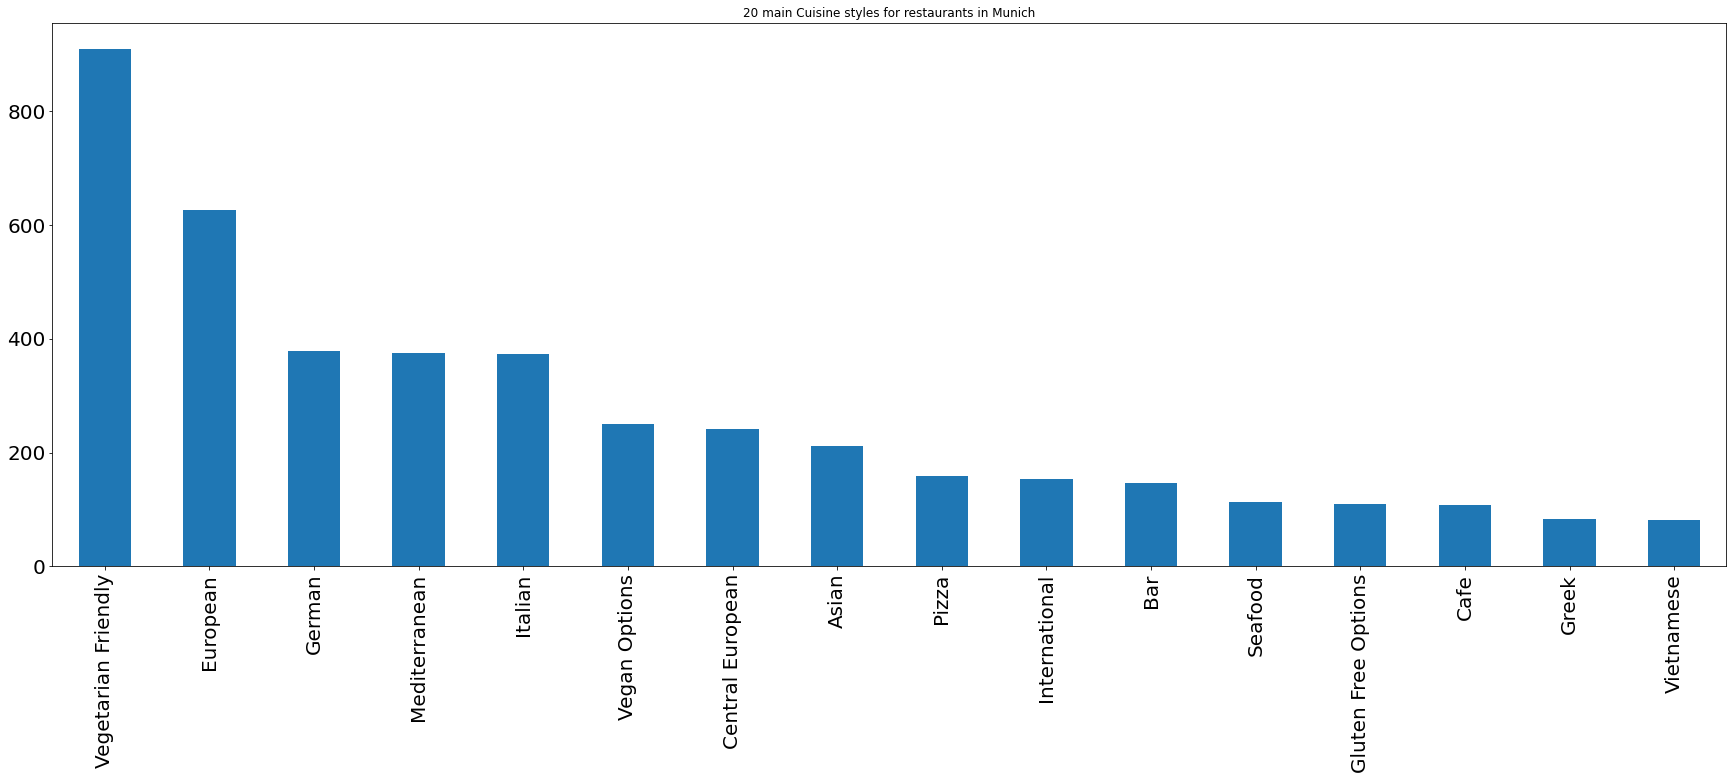

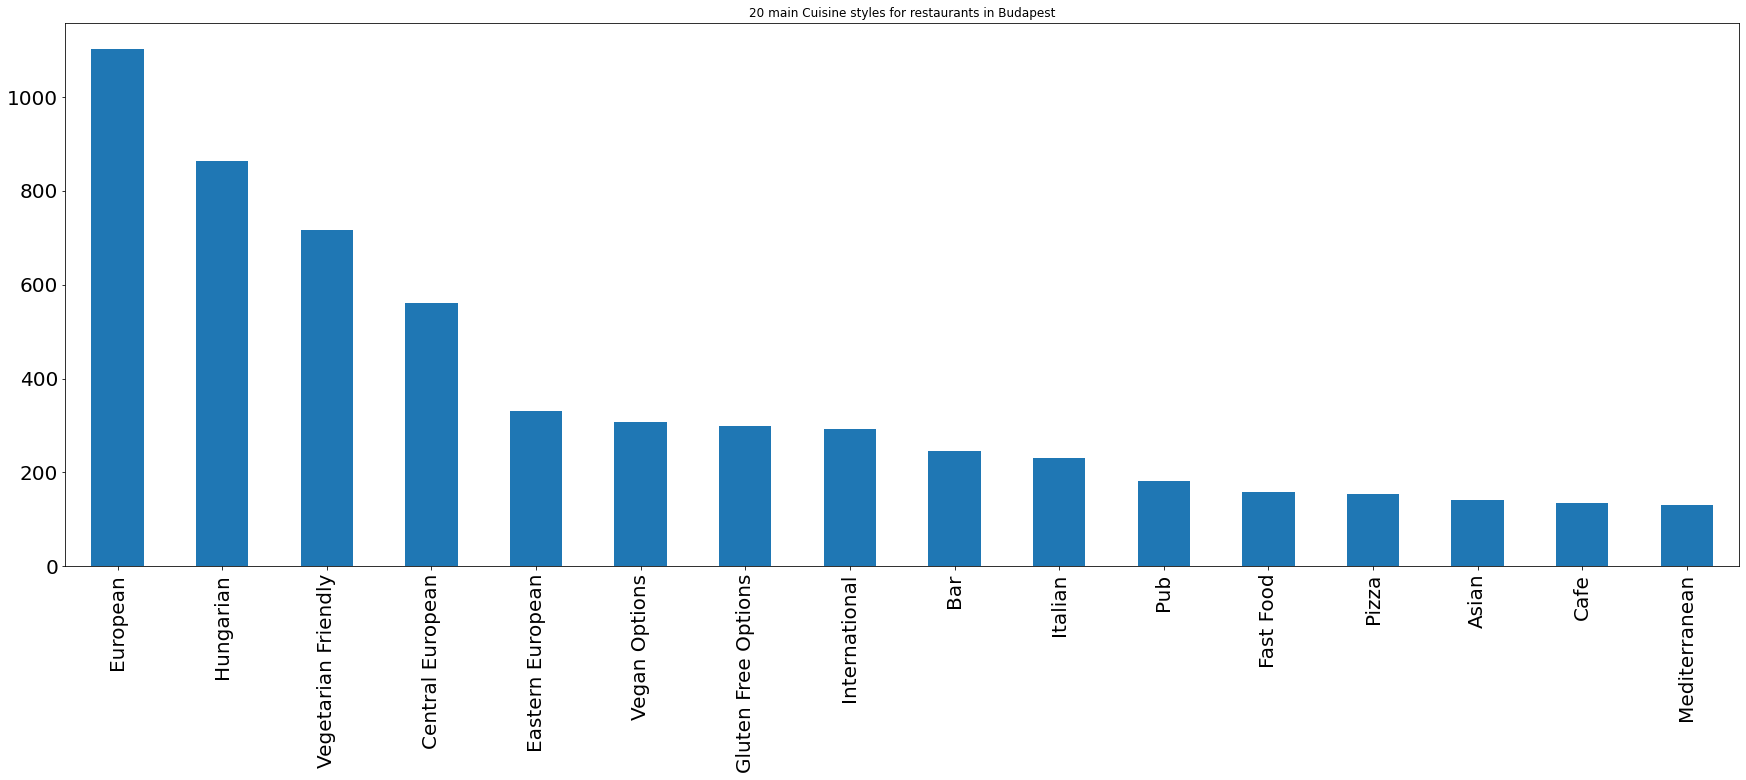

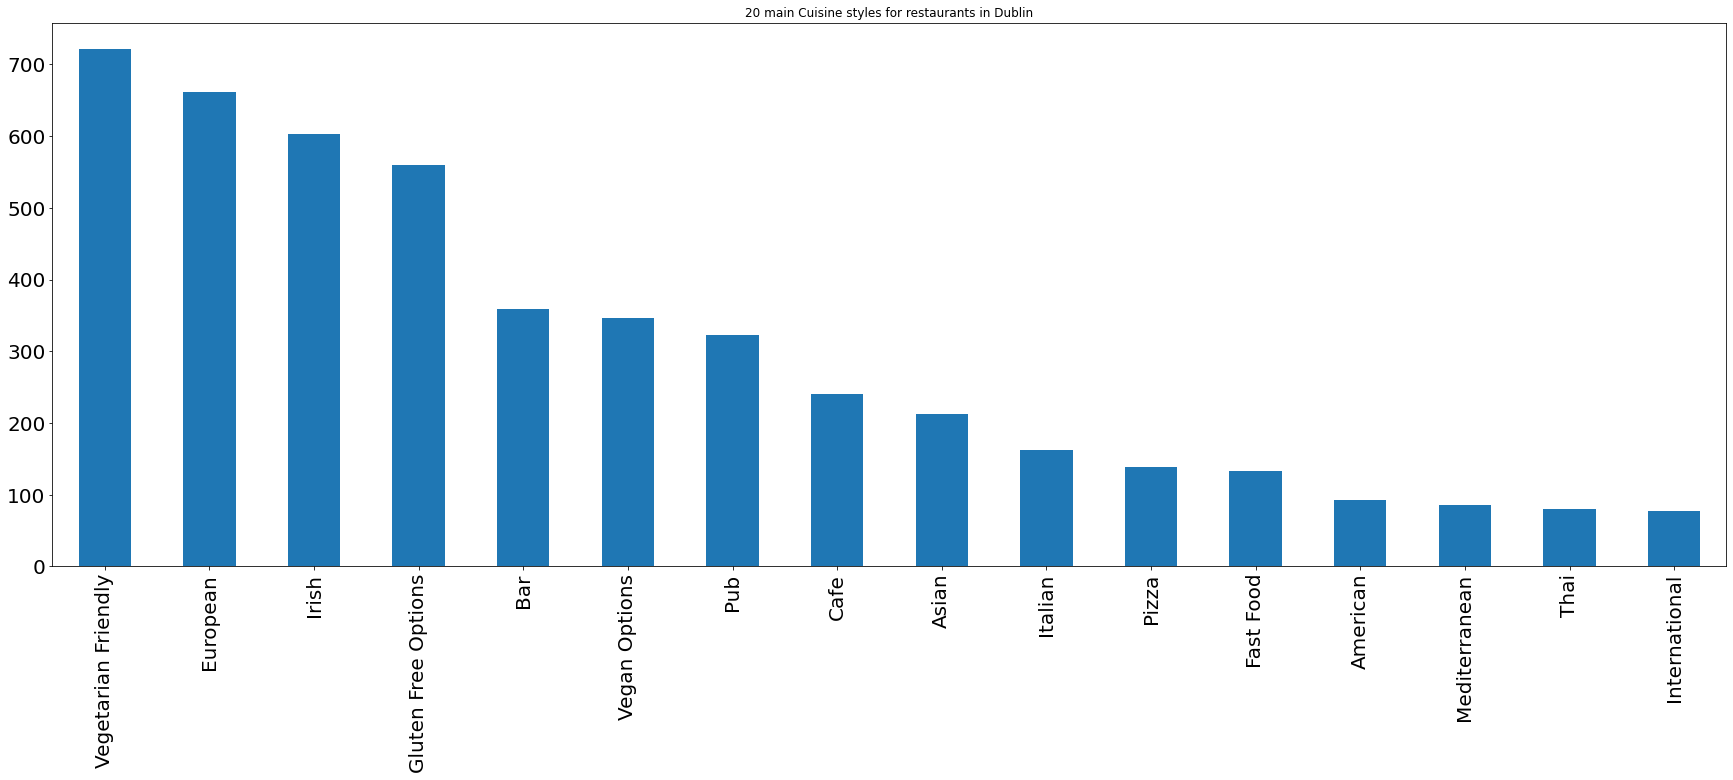

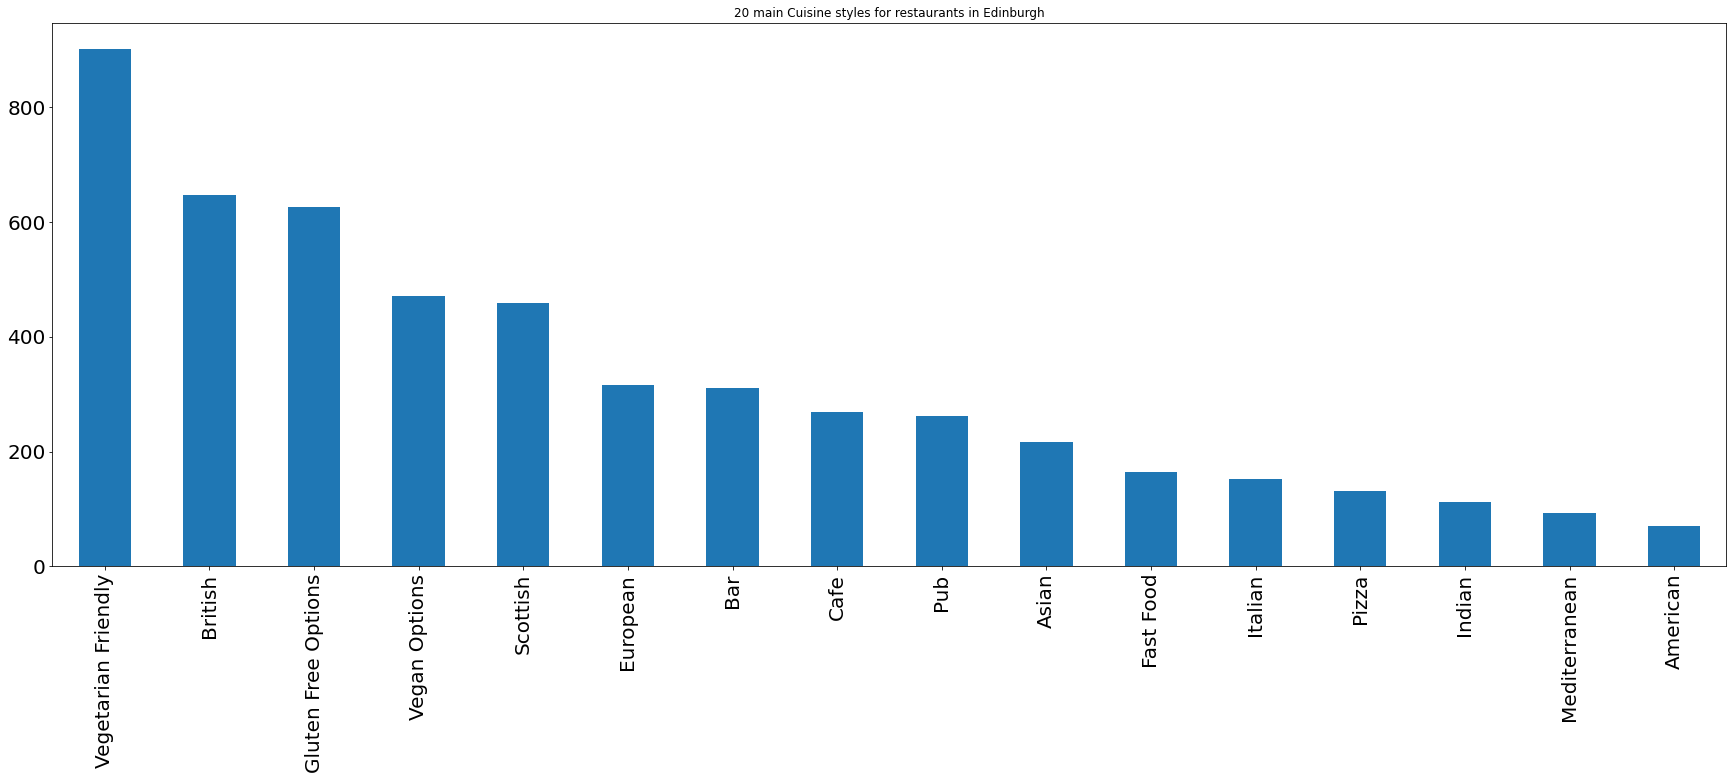

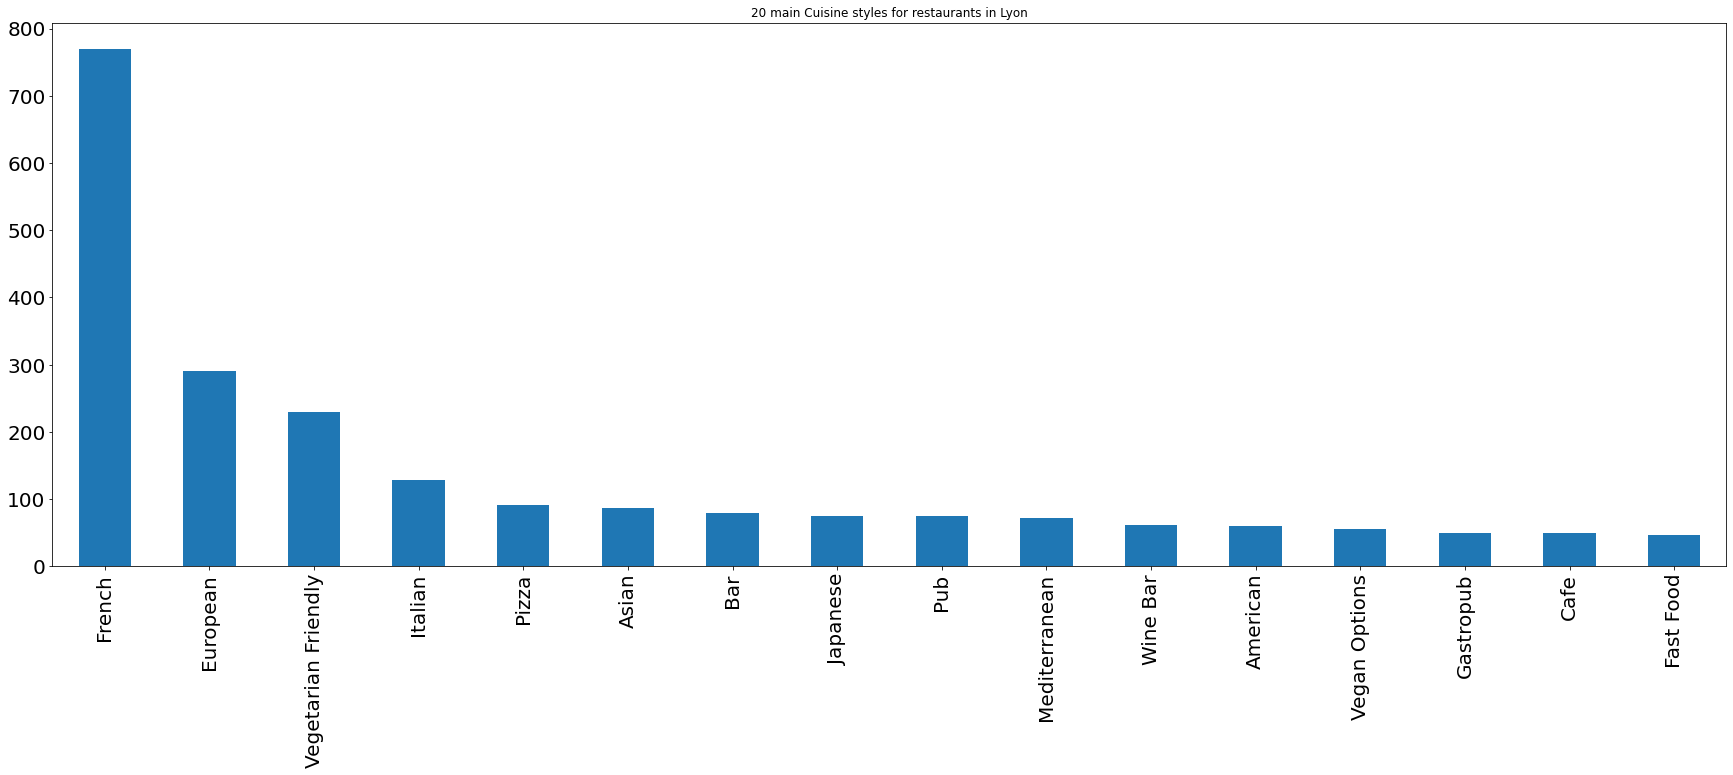

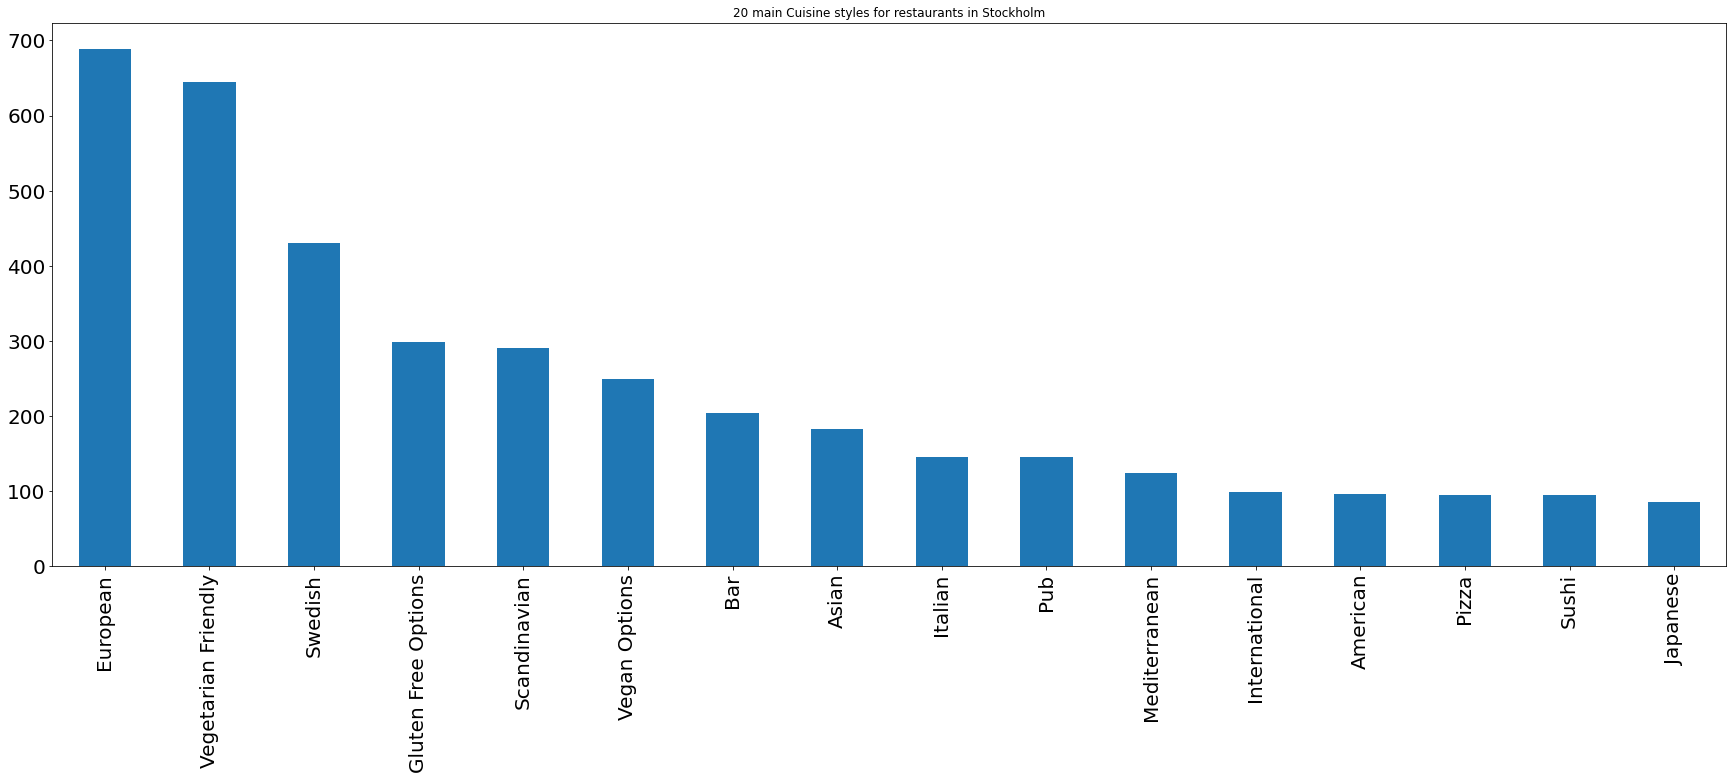

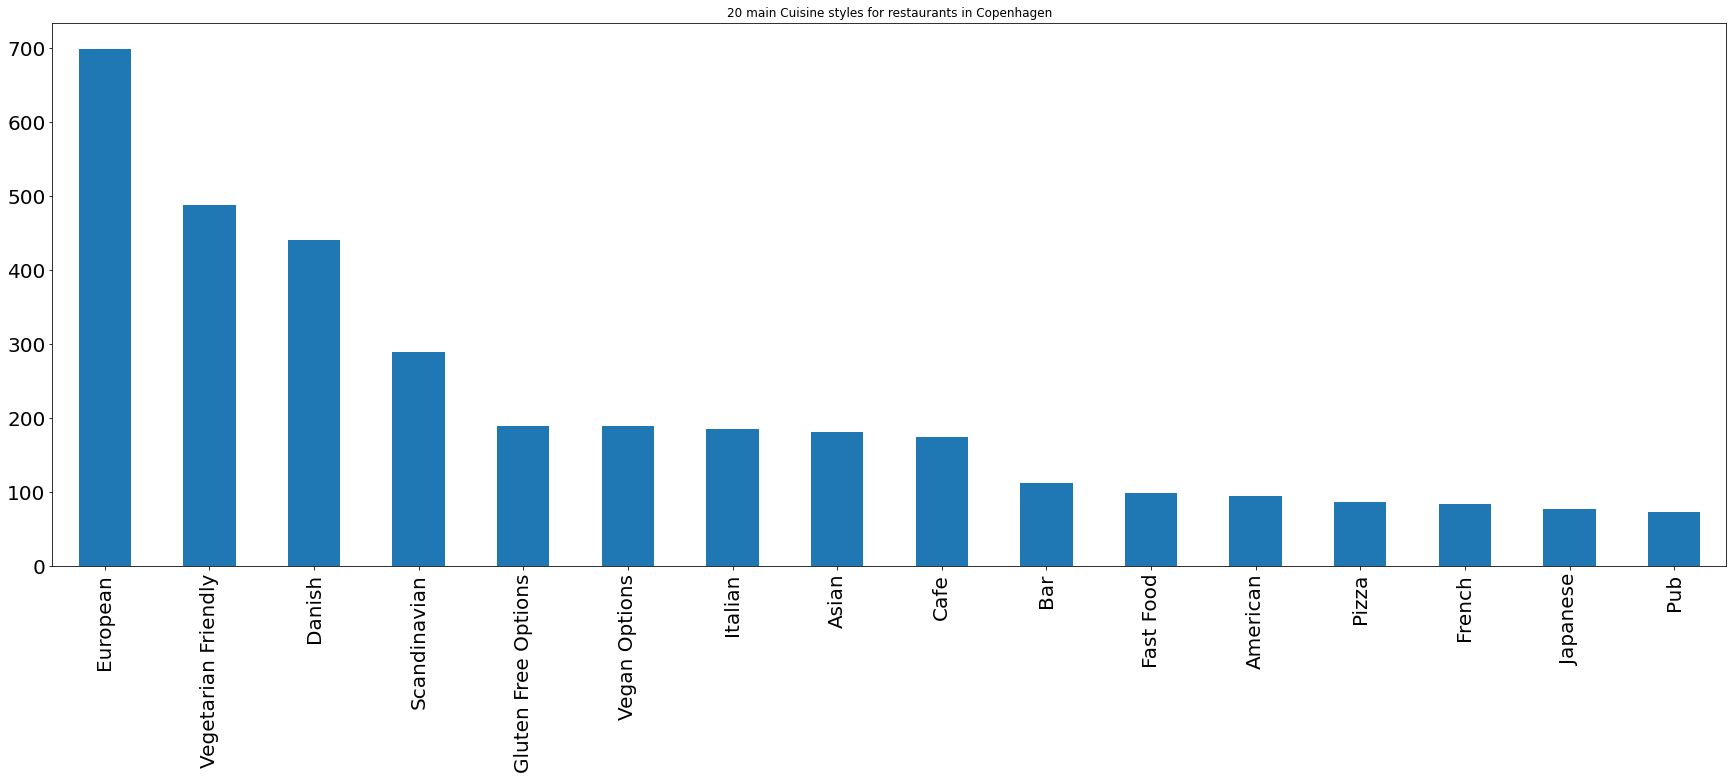

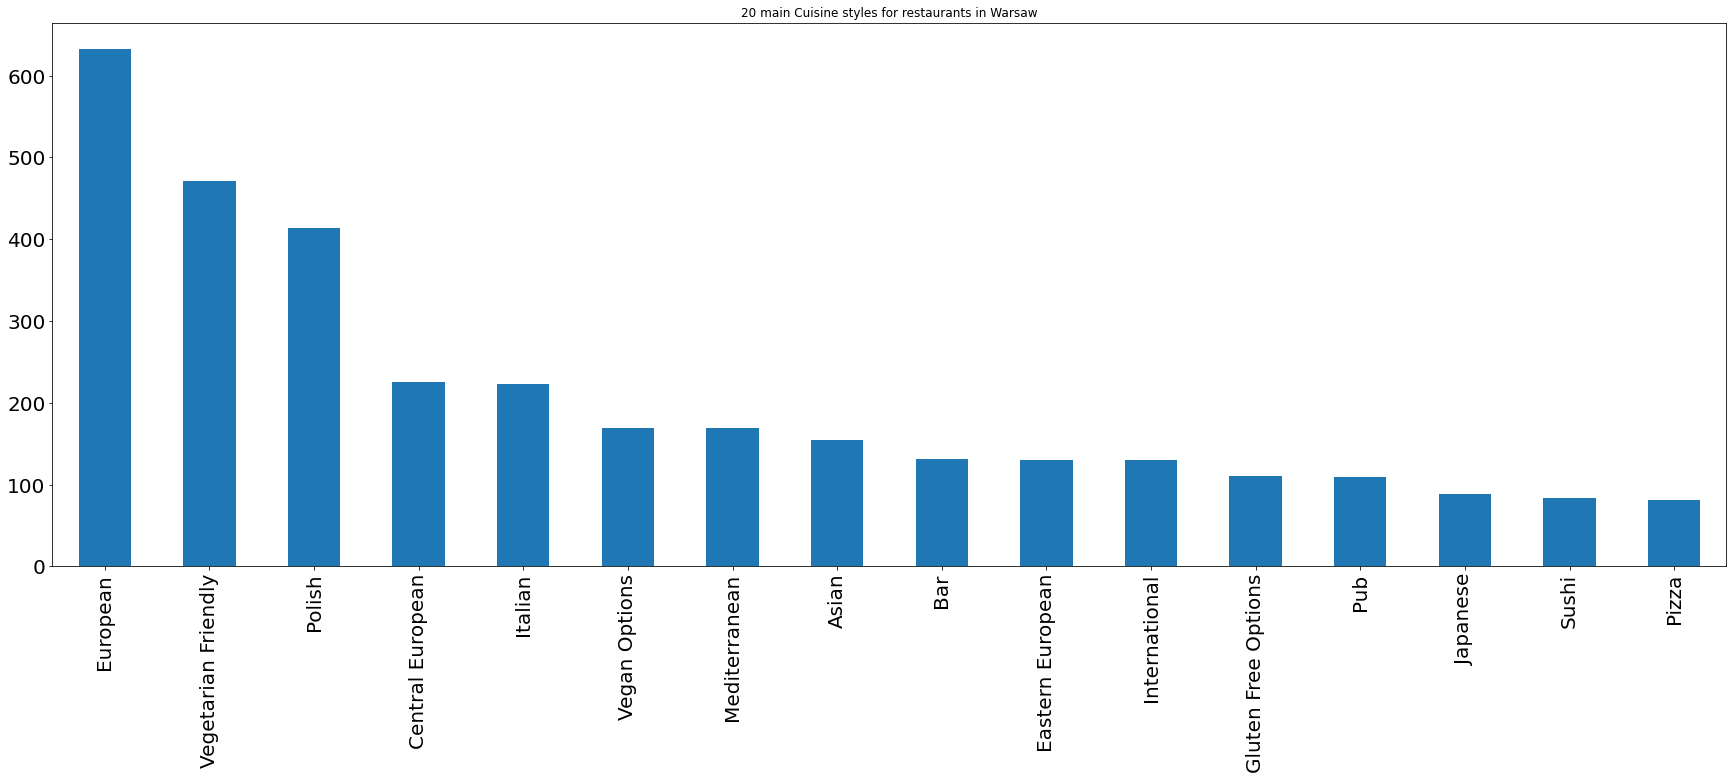

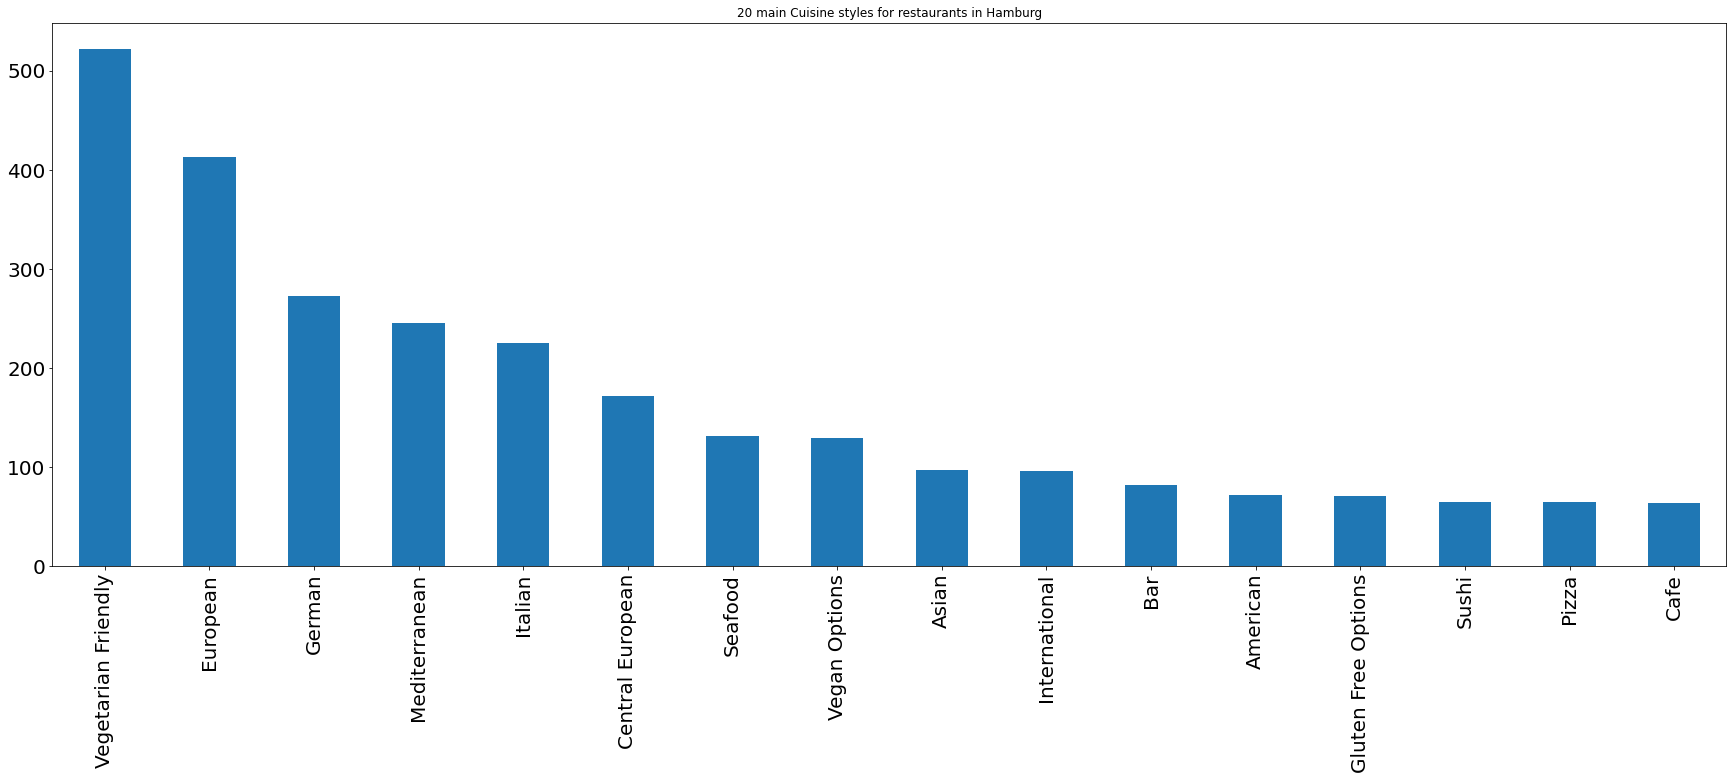

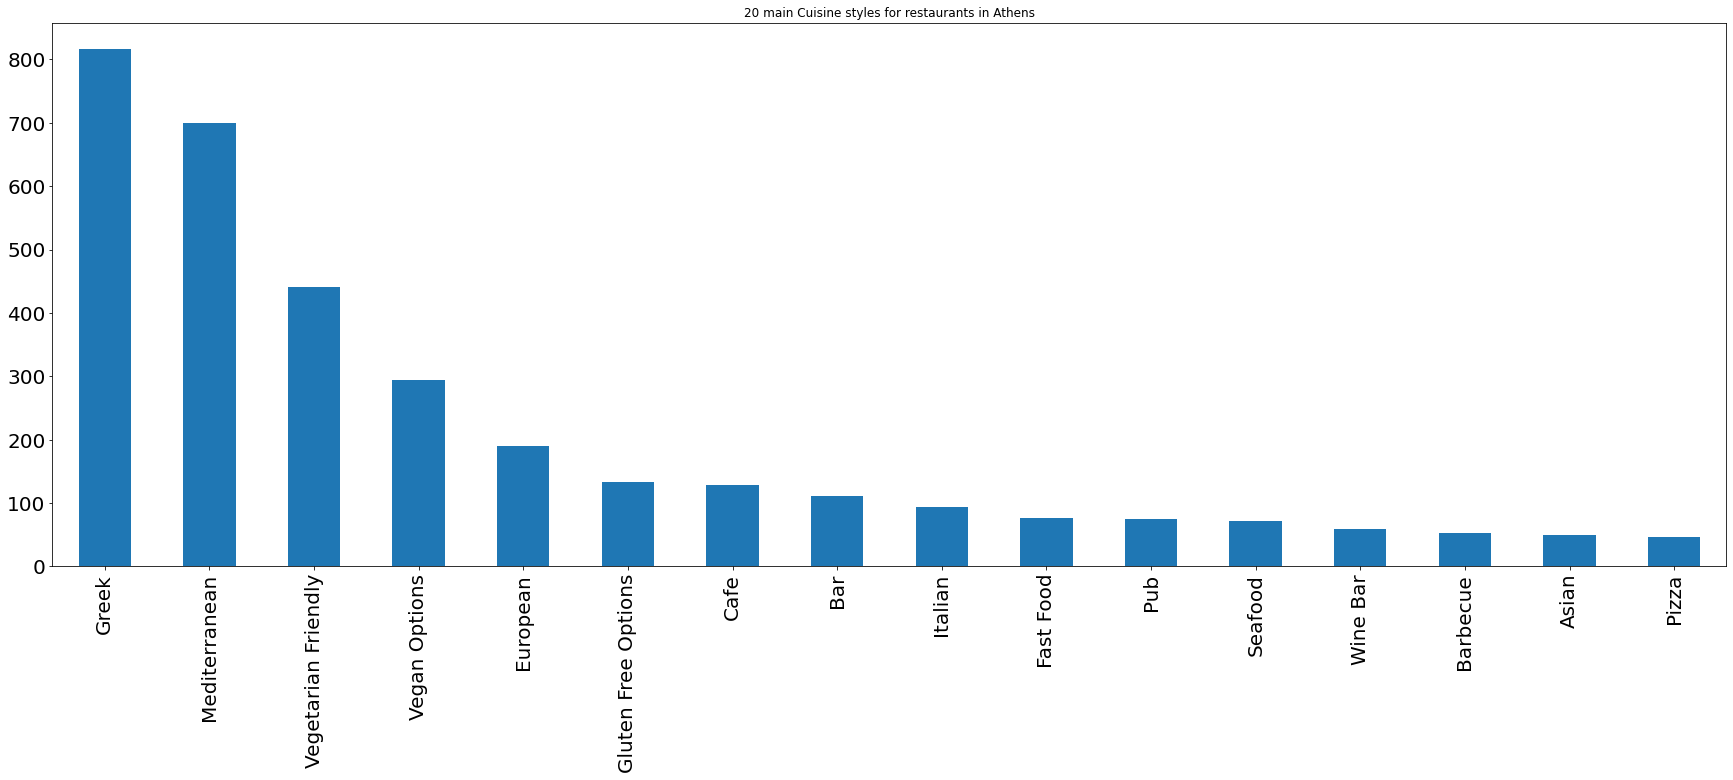

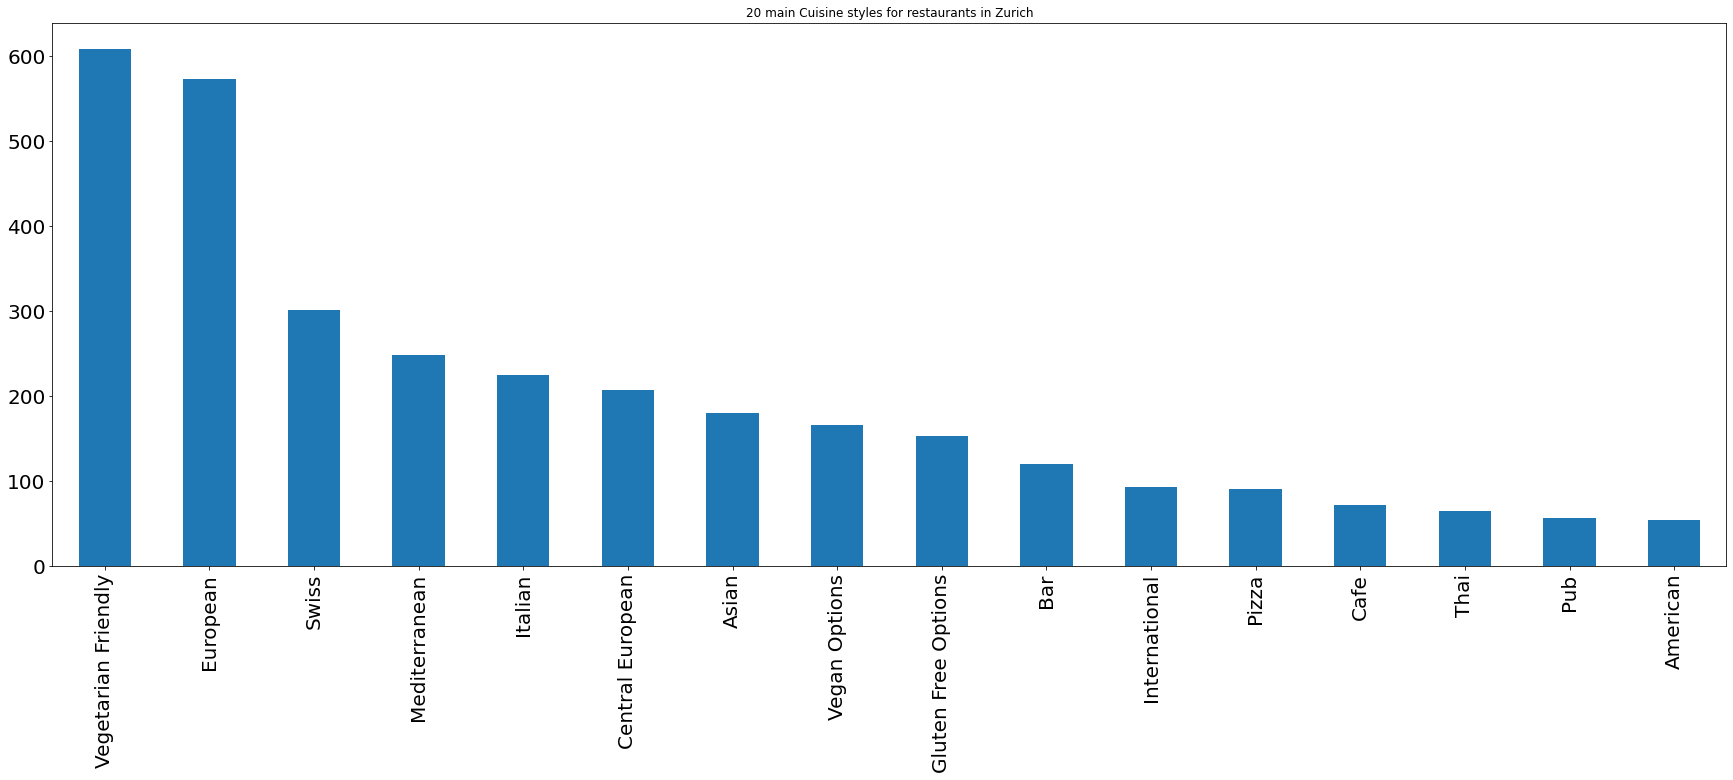

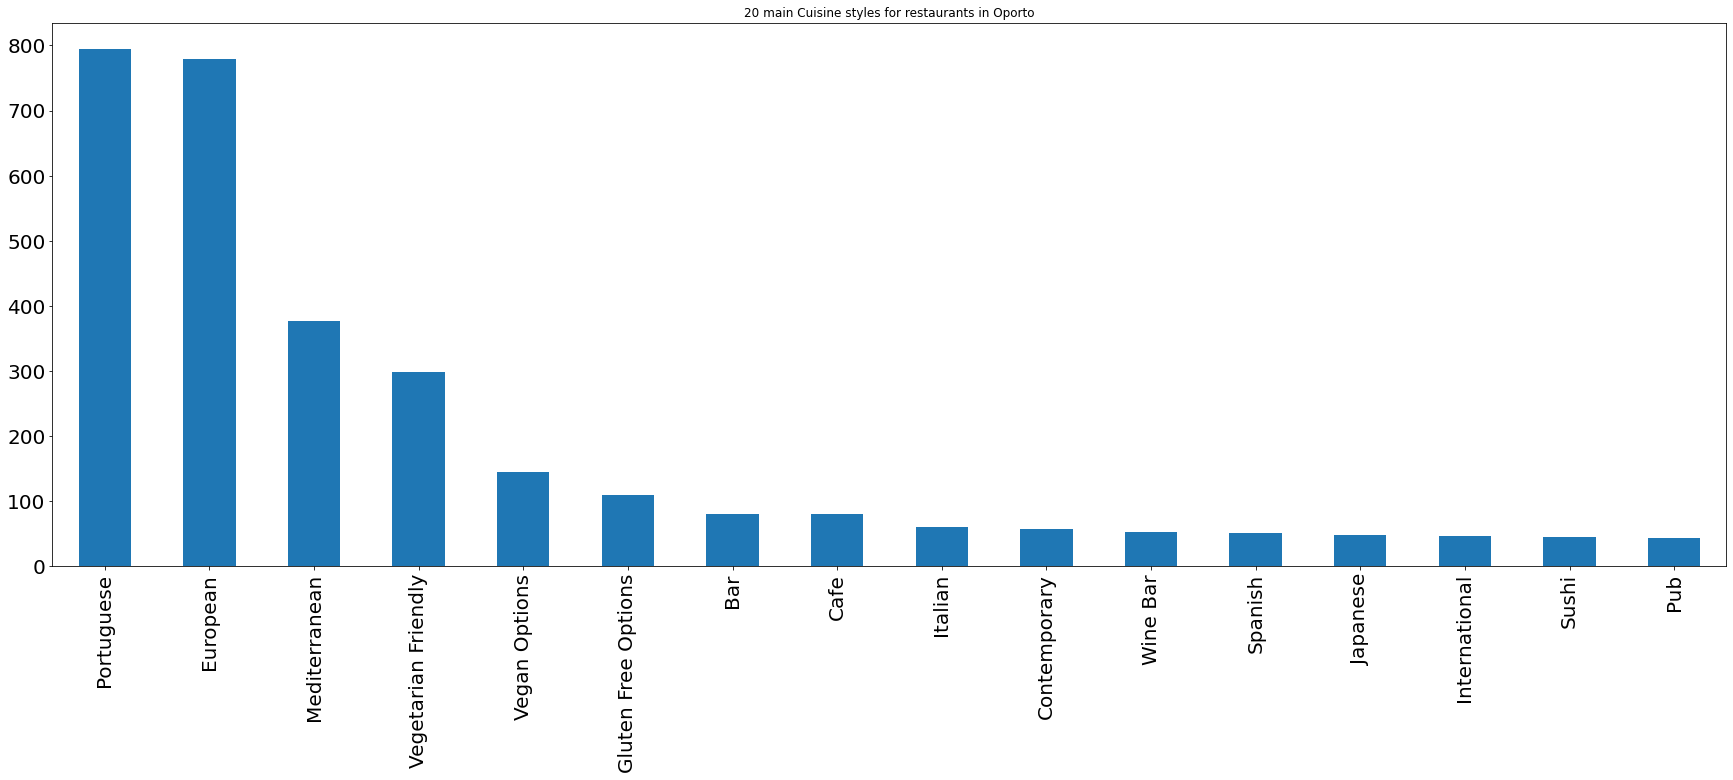

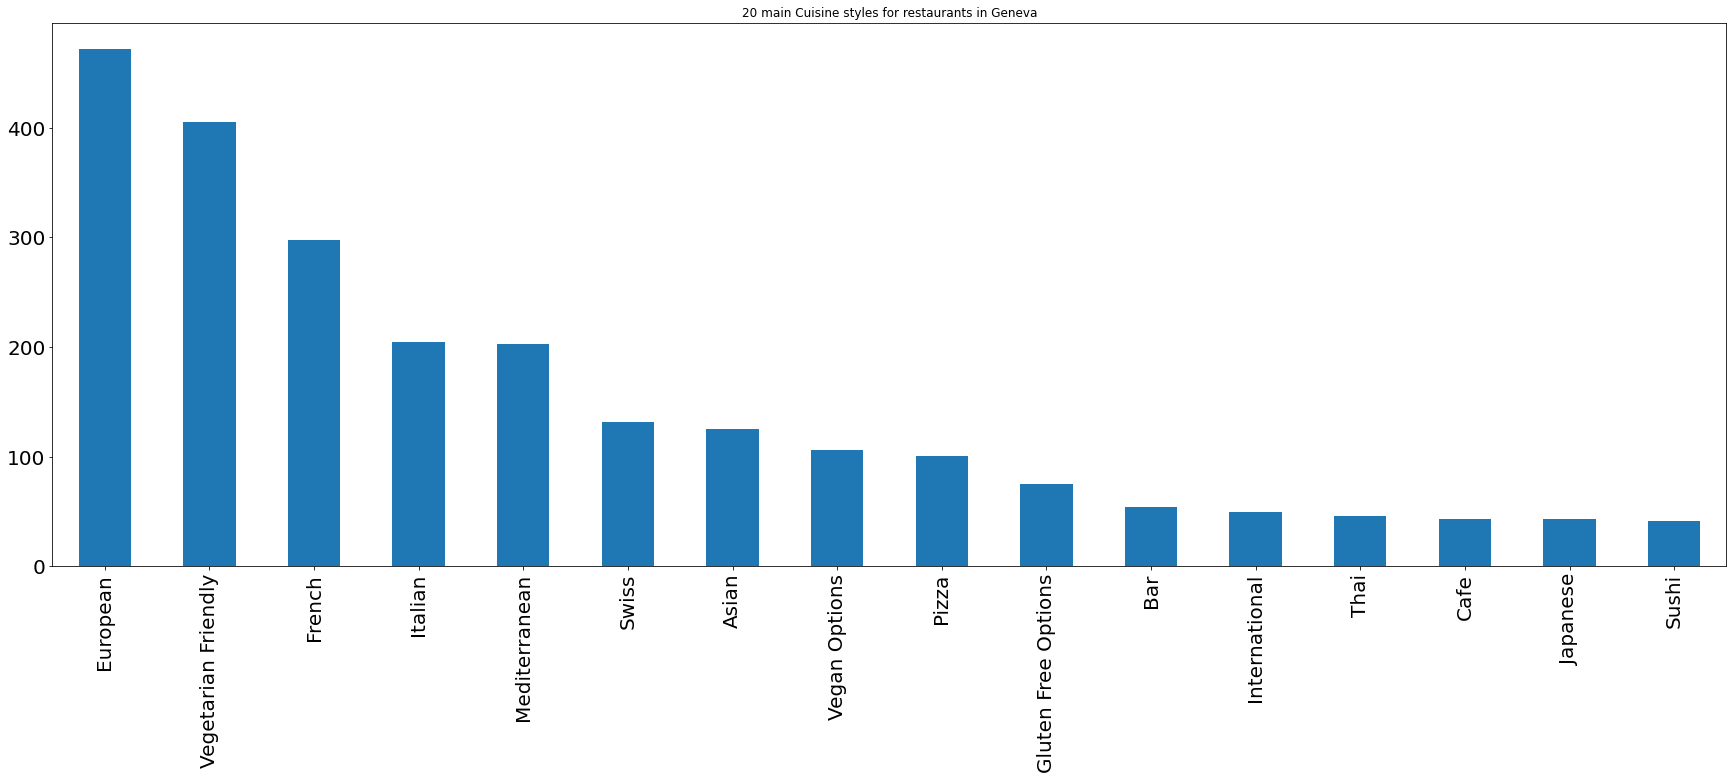

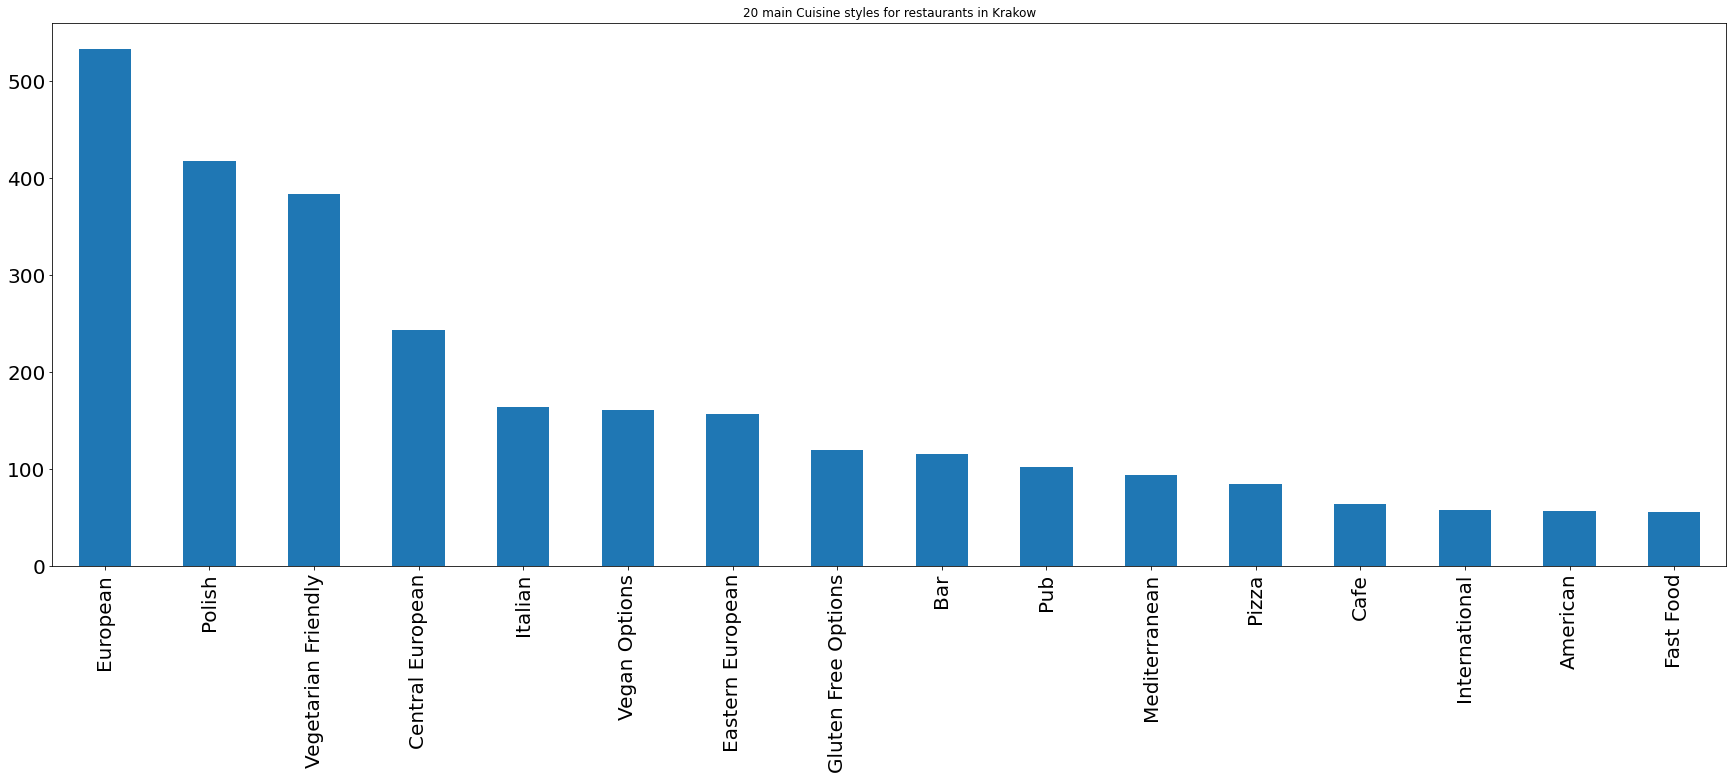

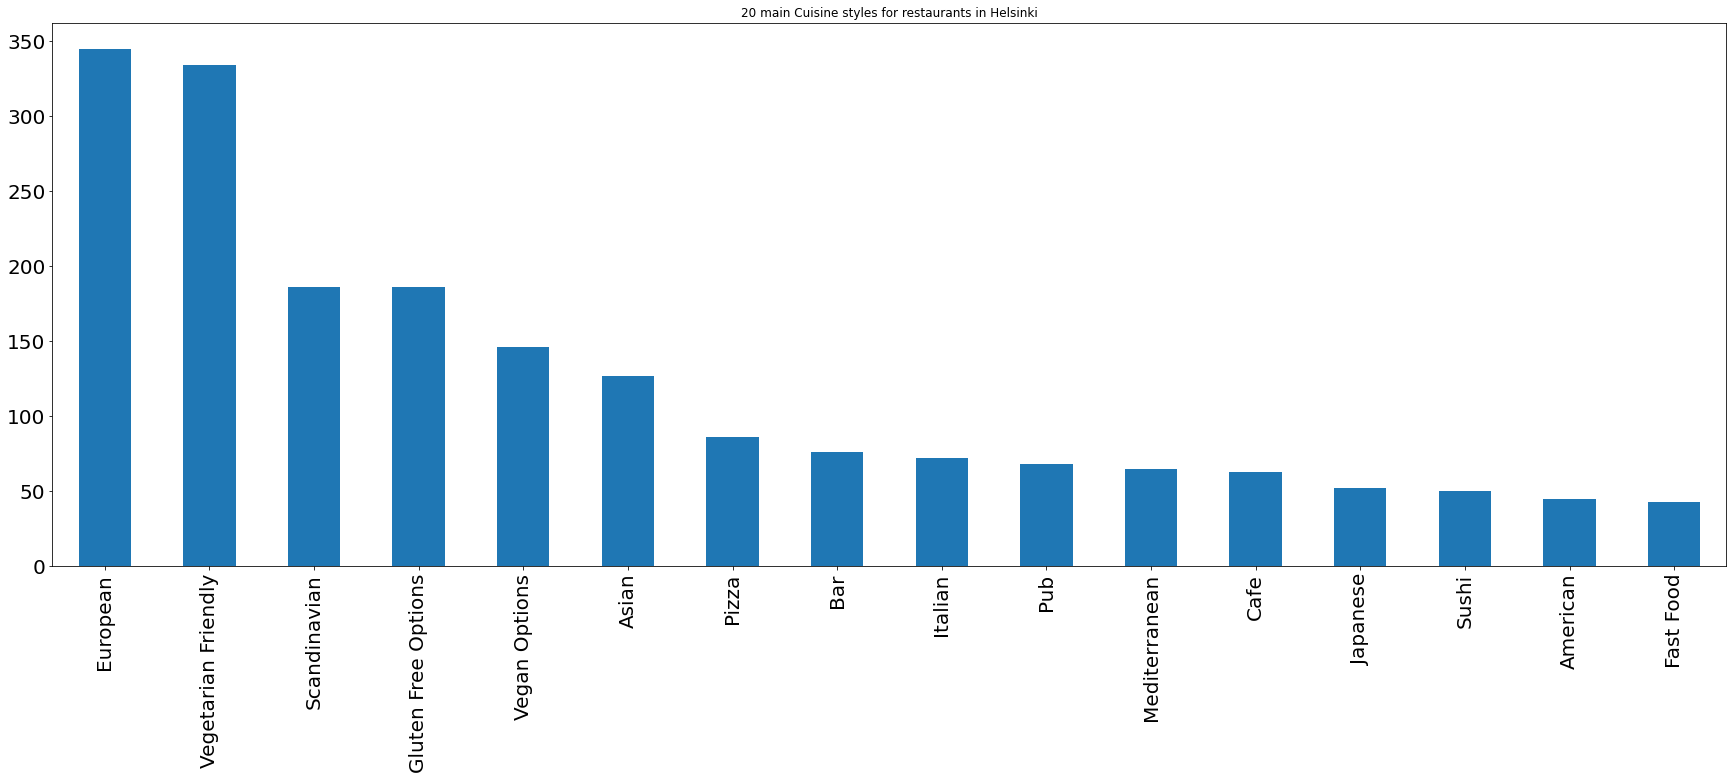

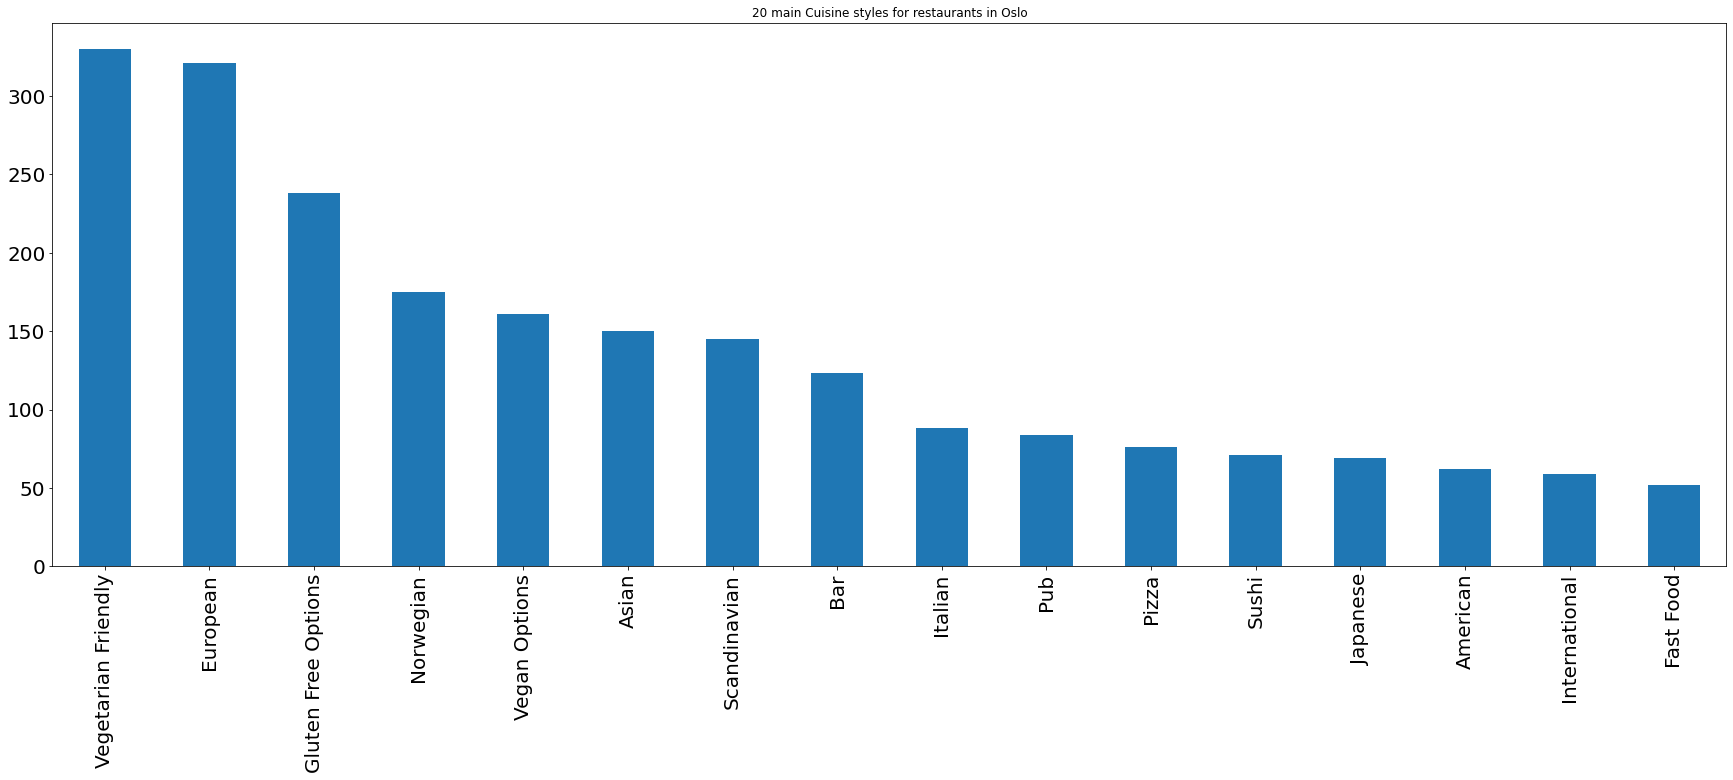

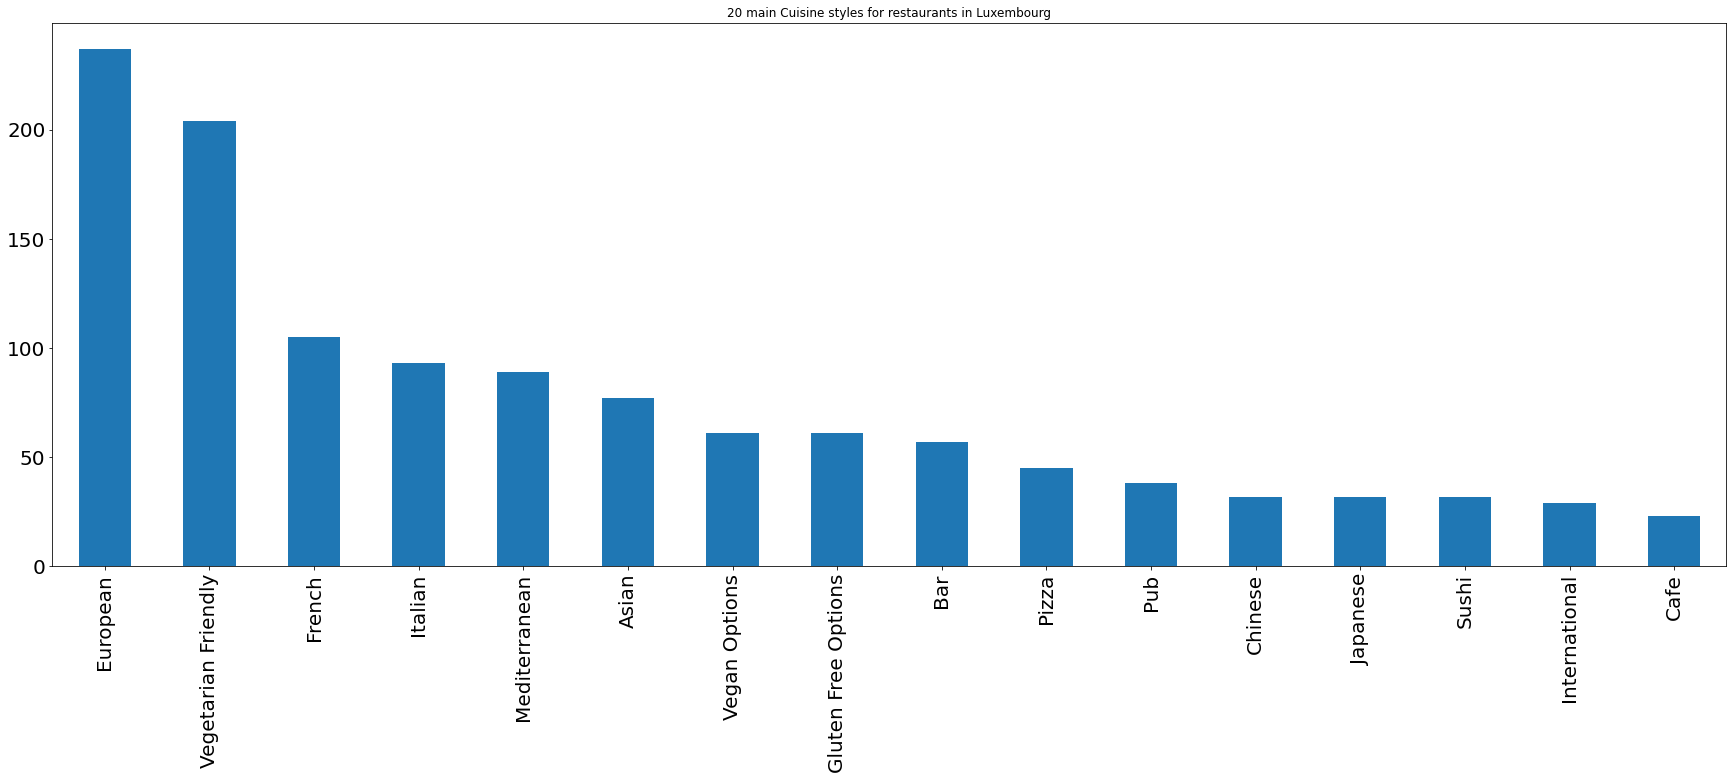

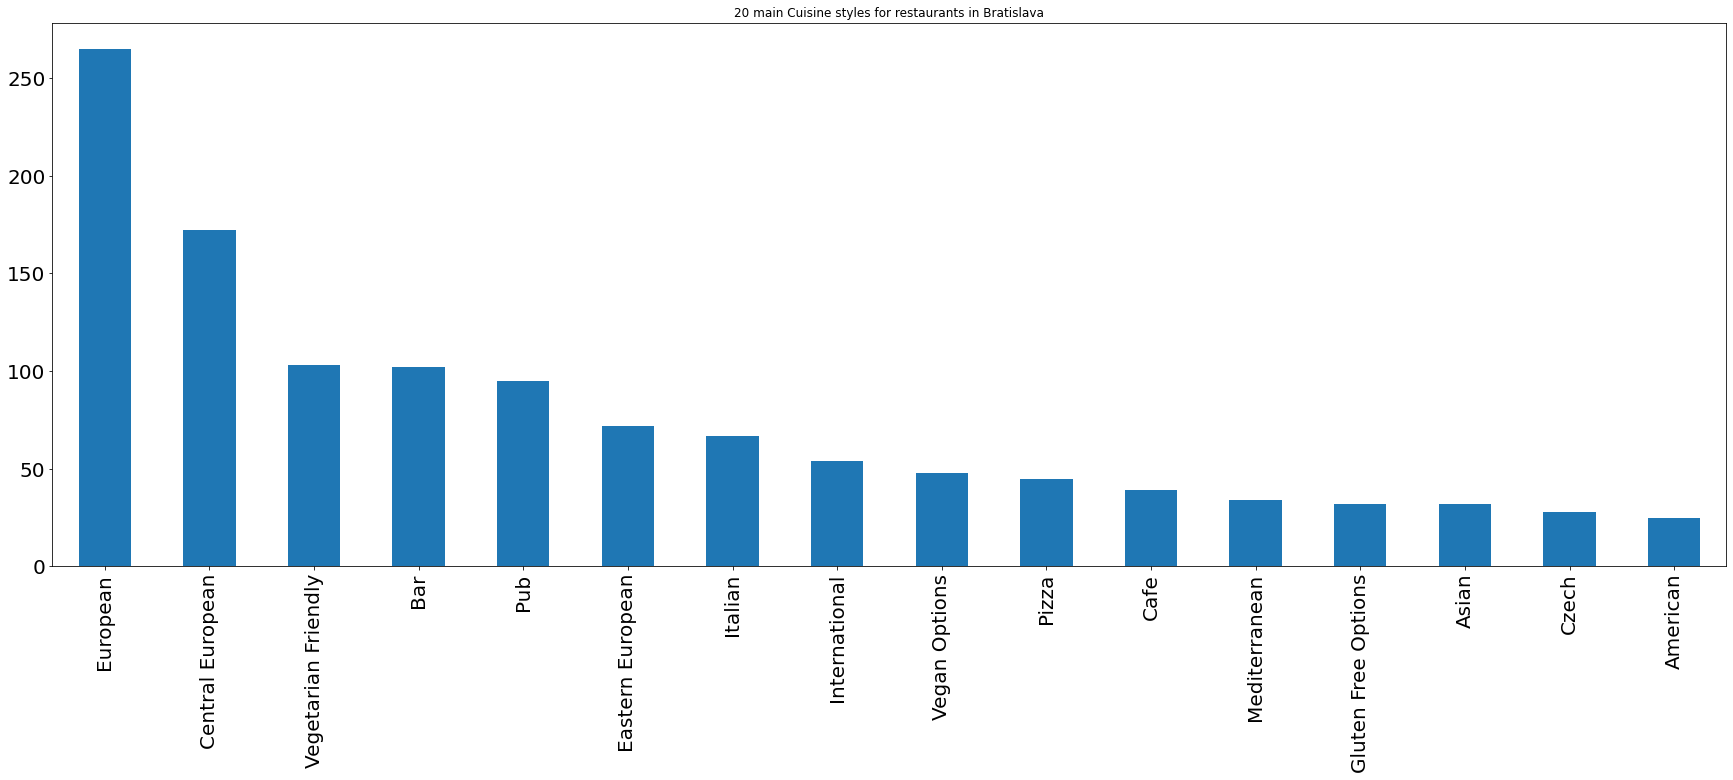

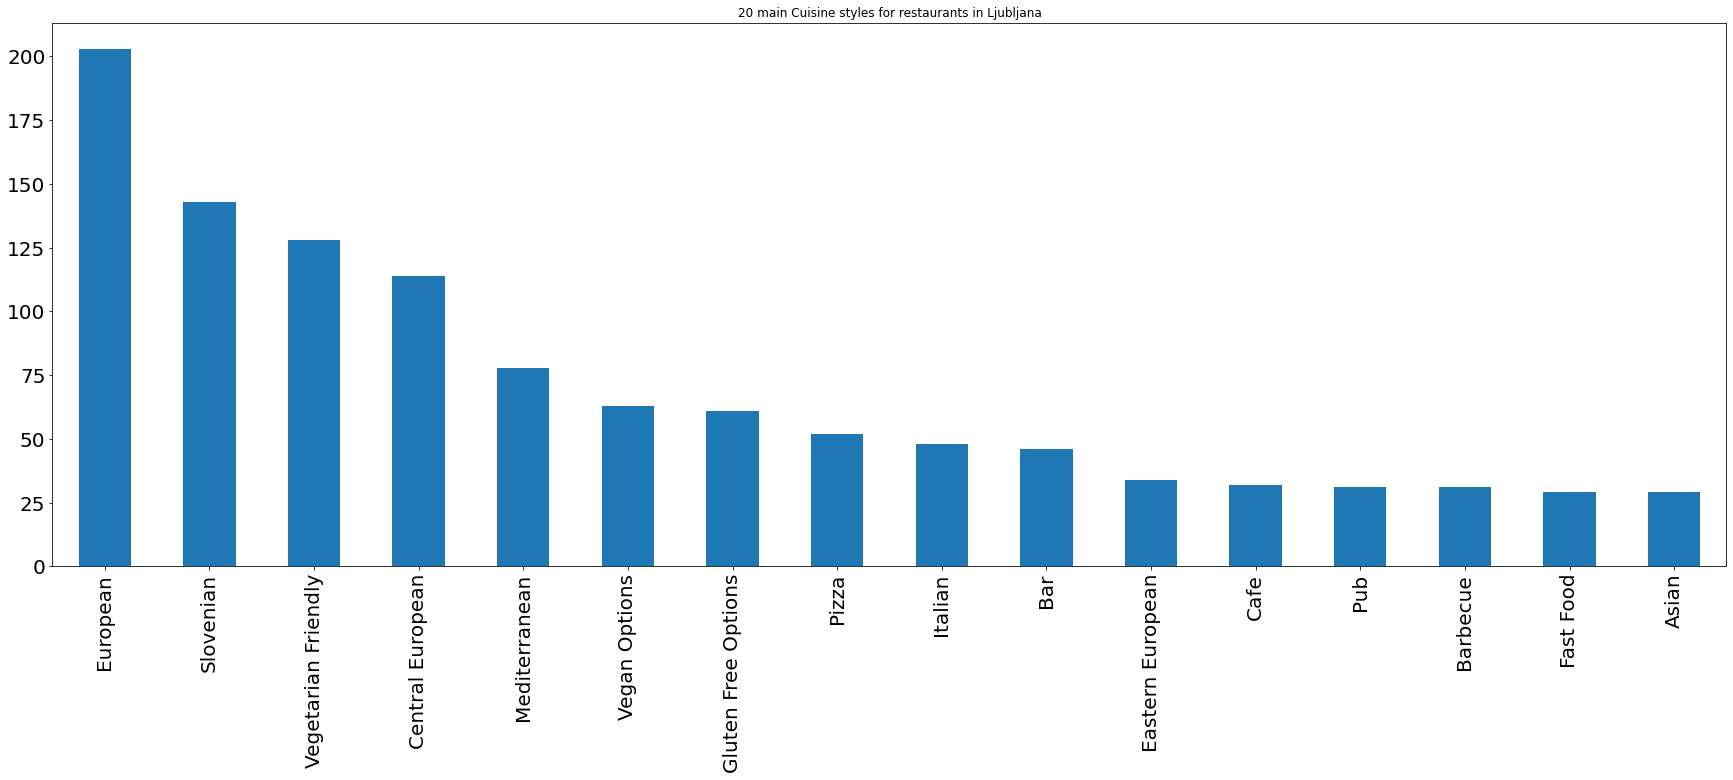

In [45]:
#Visualization of global cuisine styles count
pd.DataFrame(global_cuisine_count, index=['Global']).T.sort_values('Global', ascending=False).plot(kind='bar', figsize=(30,10), 
                                                            title='Global cuisine styles', sort_columns=True)
plt.savefig("figures/global_cuisine_count.png")
plt.show()

#Visualization of cuisine style diversity
city_number_styles.plot(kind='bar', figsize=(30,10), title='Cuisine styles diversity (number of different styles)')
plt.savefig("figures/global_cuisine_diversity.png")
plt.show()

#Visualization for each city for the 15 main cuisine styles in the city
for city in cuisine_count_df.index:
    cuisine_count_df.loc[city].sort_values(ascending=False).iloc[0:16].plot(kind='bar', 
                                                                            figsize=(30,10), fontsize=20,
                                                                            title='20 main Cuisine styles for restaurants in {}'.format(city))
    plt.savefig("figures/global_cuisine_count_{}.png".format(city))
    plt.show()

## Special Diets
- We analysed the best cities for special diets, such as Vegetarian, Gluten Free, Vegan, Halal and Kosher

/var/folders/_r/29t8d54923b4pl12b1nwq531b09791/T/ipykernel_72933/860642577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_count_df['Total Restaurants'] = global_number


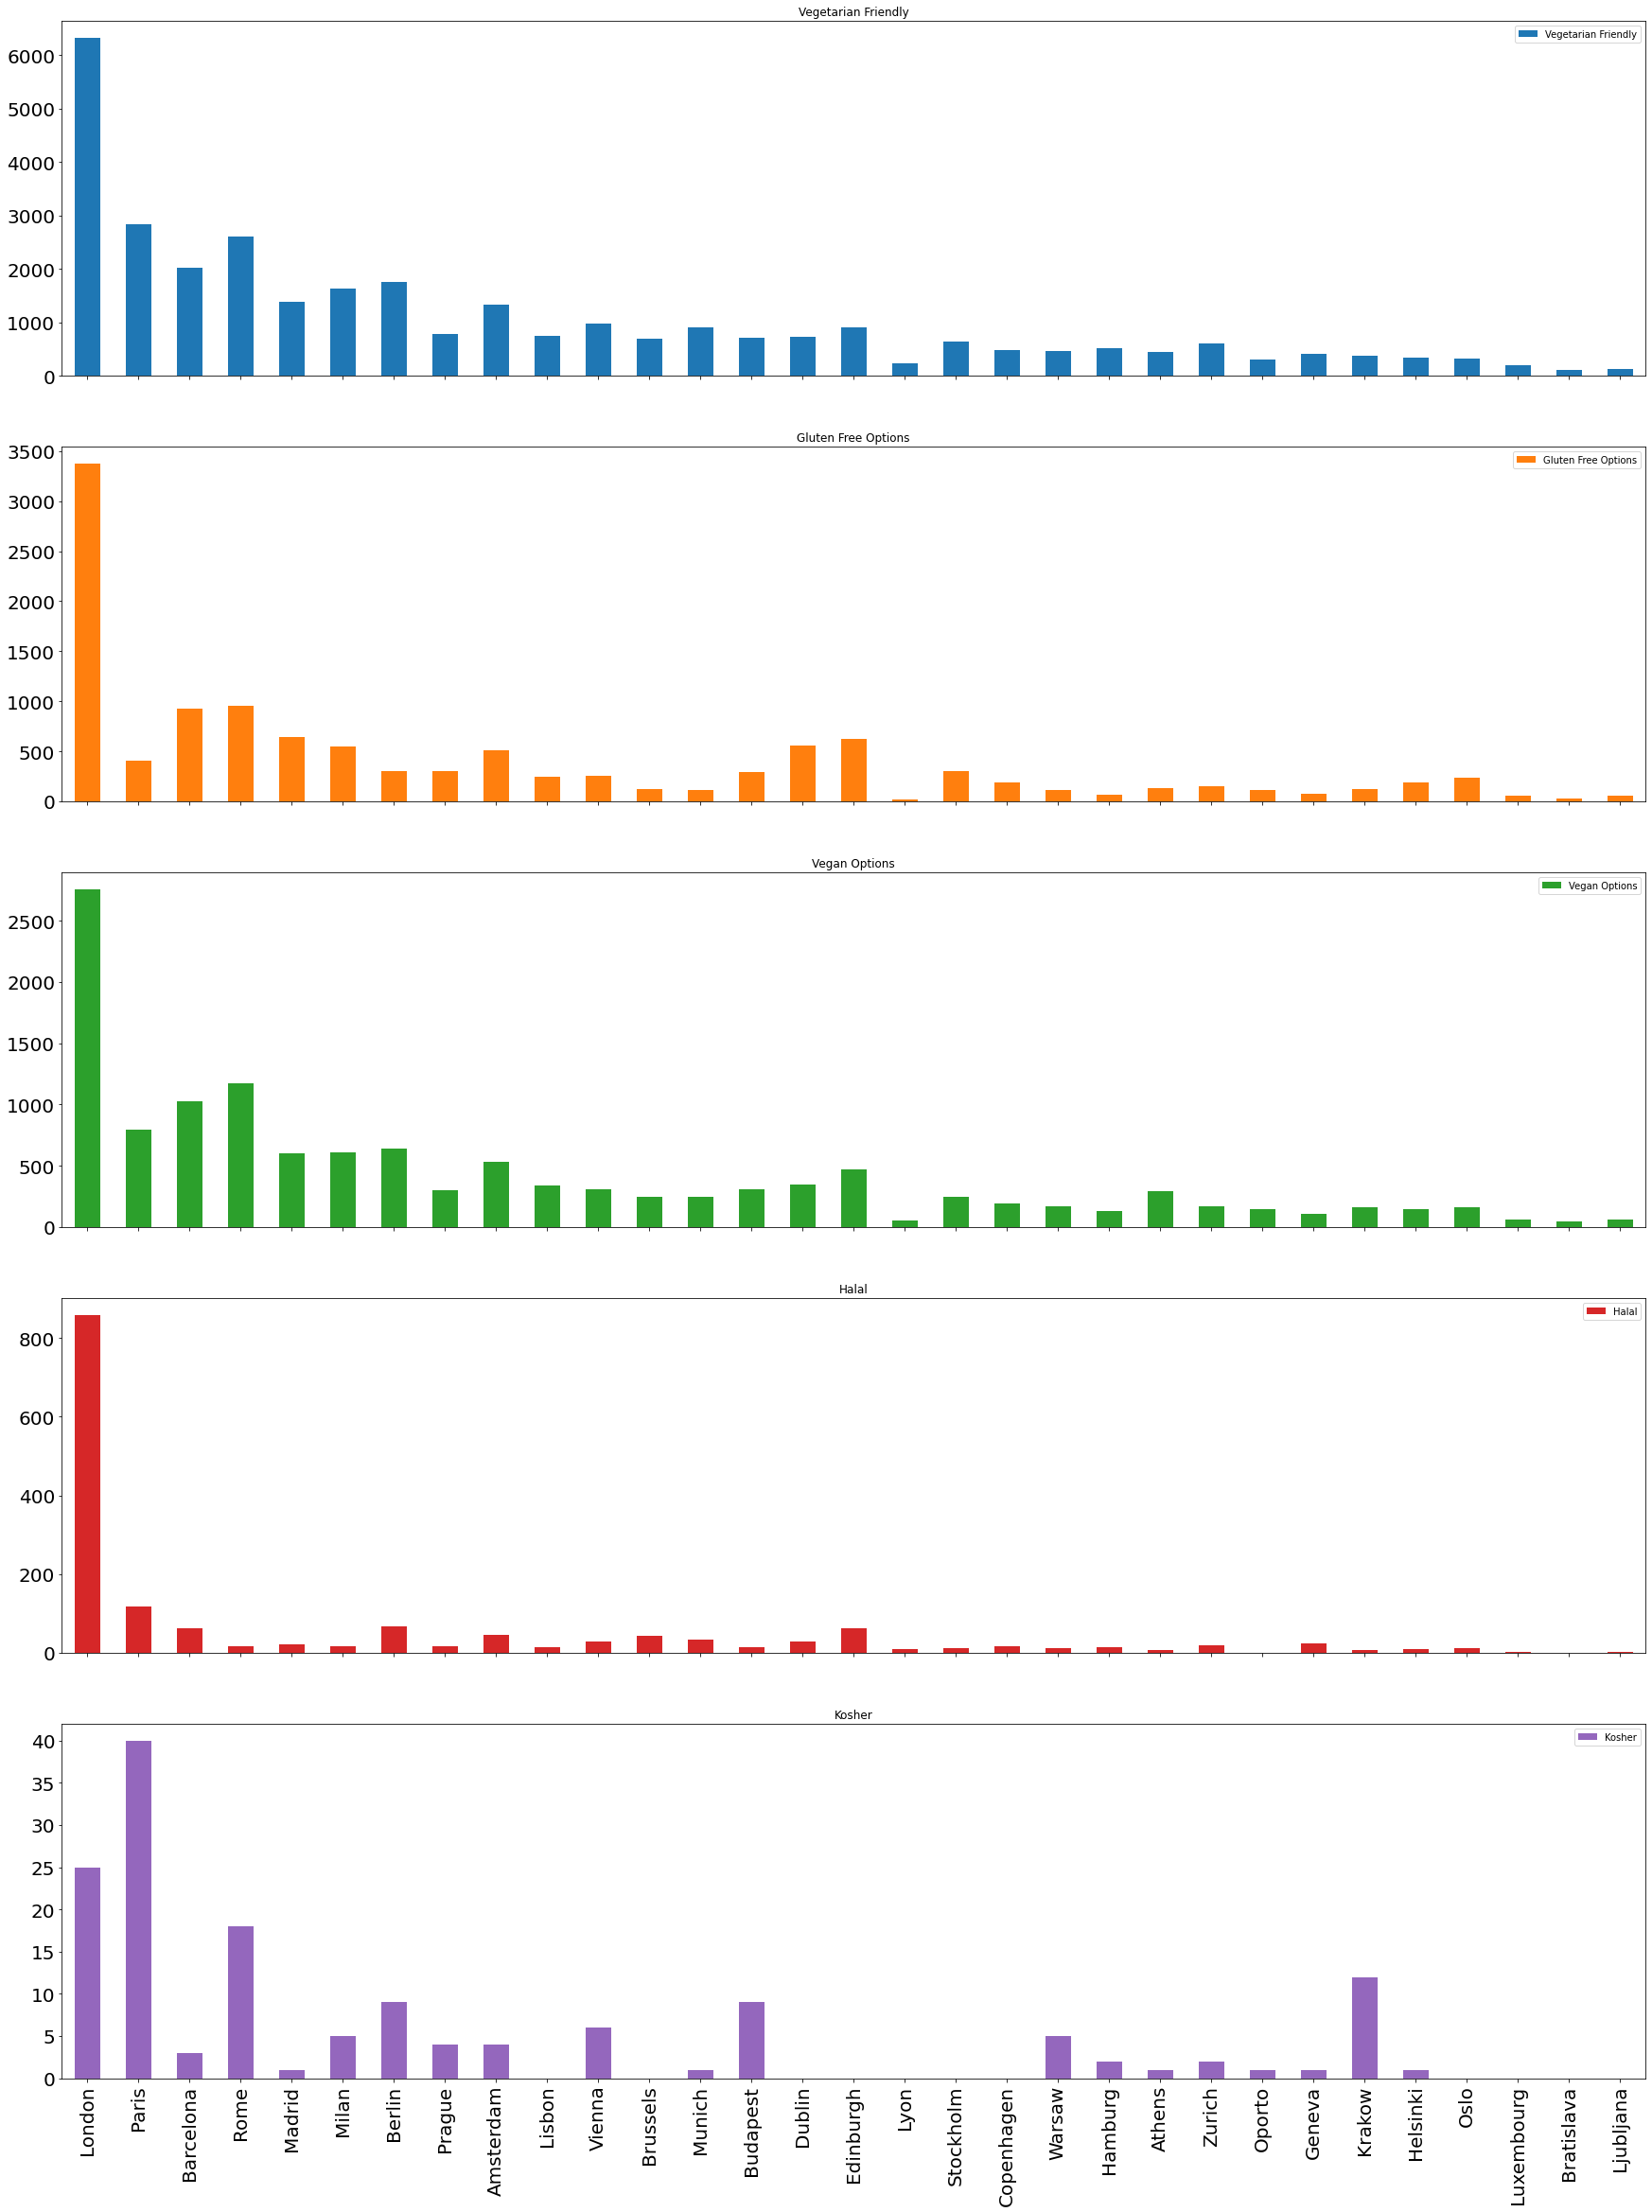

/var/folders/_r/29t8d54923b4pl12b1nwq531b09791/T/ipykernel_72933/860642577.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_count_df['% Vegetarian Friendly'] = special_count_df['Vegetarian Friendly'] / global_number
/var/folders/_r/29t8d54923b4pl12b1nwq531b09791/T/ipykernel_72933/860642577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_count_df['% Gluten Free Options'] = special_count_df['Gluten Free Options'] / global_number
/var/folders/_r/29t8d54923b4pl12b1nwq531b09791/T/ipykern

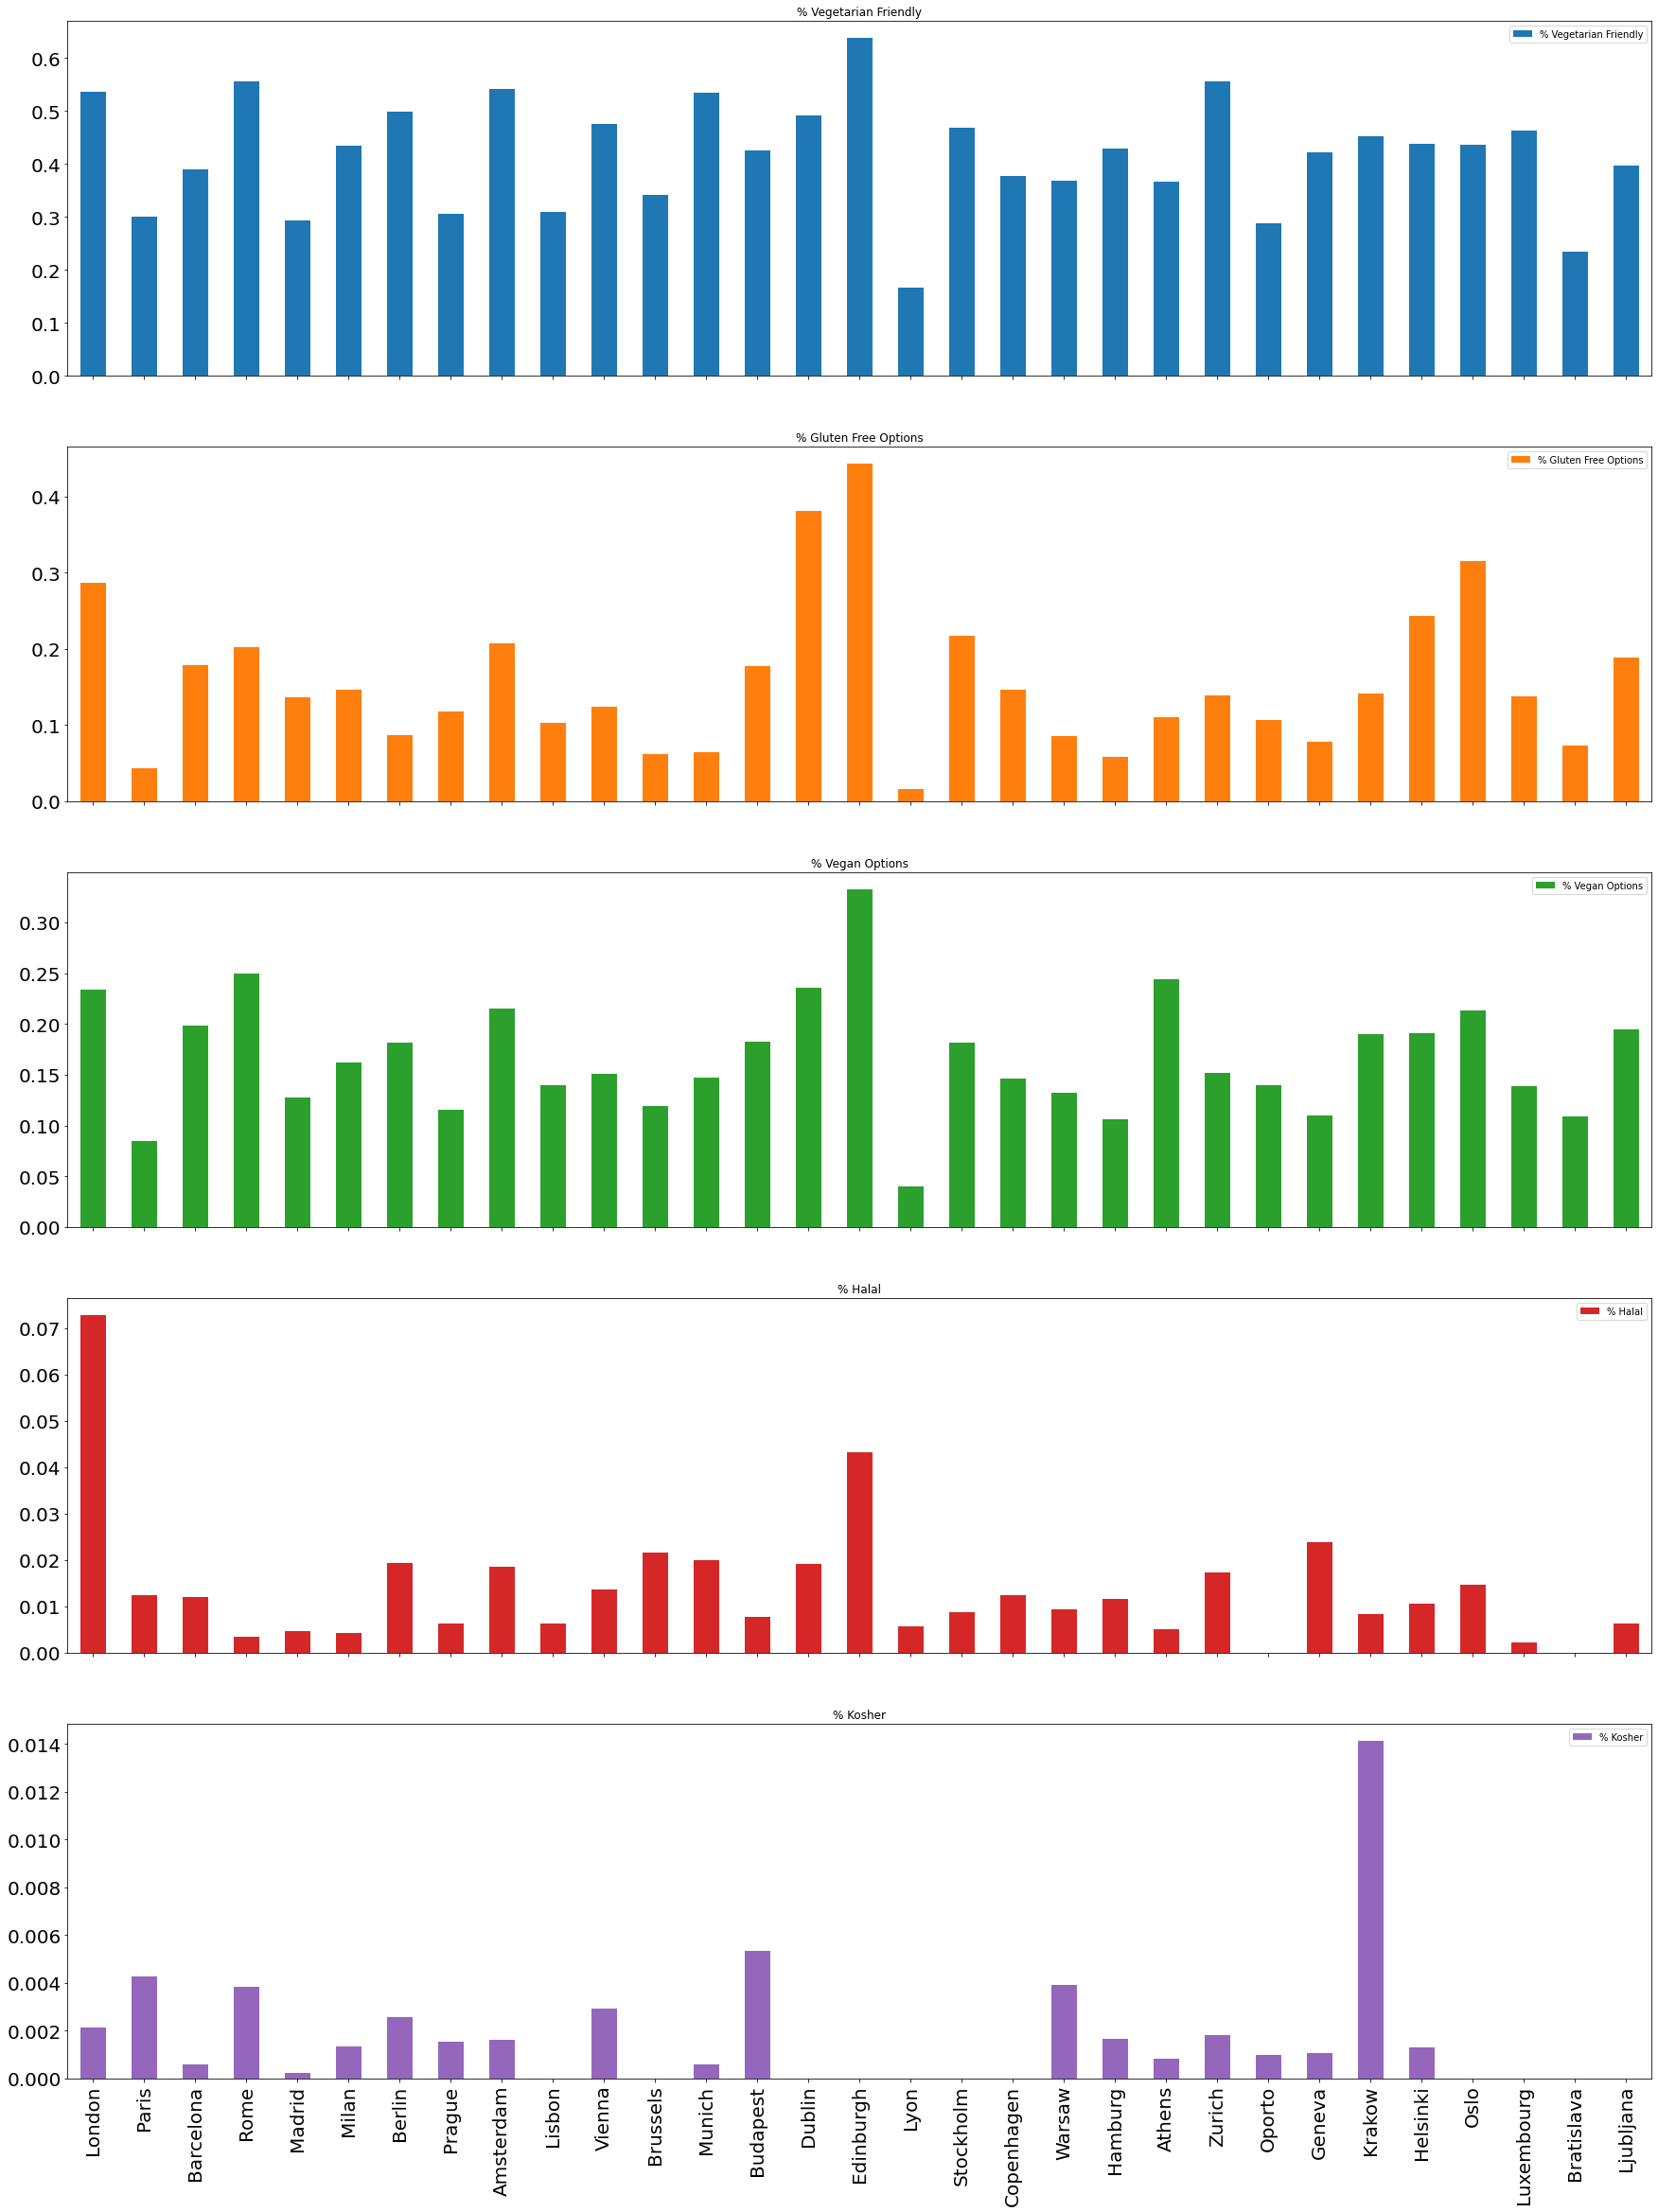

           Vegetarian Friendly  Gluten Free Options  Vegan Options  Halal  \
London                    6323                 3375           2758  859.0   
Paris                     2828                  409            797  117.0   
Barcelona                 2019                  925           1027   62.0   
Rome                      2612                  952           1173   16.0   
Madrid                    1377                  643            600   22.0   

           Kosher  Total Restaurants  % Vegetarian Friendly  \
London       25.0              11795               0.536075   
Paris        40.0               9398               0.300915   
Barcelona     3.0               5185               0.389392   
Rome         18.0               4701               0.555626   
Madrid        1.0               4692               0.293478   

           % Gluten Free Options  % Vegan Options   % Halal  % Kosher  
London                  0.286138         0.233828  0.072827  0.002120  
Paris         

In [46]:
#Cities with the most of restaurants with special diets cuisine
special_count_df = cuisine_count_df[['Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options', 'Halal', 'Kosher']]
special_count_df['Total Restaurants'] = global_number
special_count_df.plot(kind='bar', subplots=True, figsize=(30,40), fontsize=20,
                      y=['Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options', 'Halal', 'Kosher'])
#plt.savefig("figures/special diets rest per city.svg")
#plt.savefig("figures/special diets rest per city.png")
plt.show()

#With ratio out of total number of restaurants (normalized)
special_count_df['% Vegetarian Friendly'] = special_count_df['Vegetarian Friendly'] / global_number
special_count_df['% Gluten Free Options'] = special_count_df['Gluten Free Options'] / global_number
special_count_df['% Vegan Options'] = special_count_df['Vegan Options'] / global_number
special_count_df['% Halal'] = special_count_df['Halal'] / global_number
special_count_df['% Kosher'] = special_count_df['Kosher'] / global_number
special_count_df.plot(kind='bar', subplots=True, figsize=(30,40), fontsize=20,
                      y=['% Vegetarian Friendly', '% Gluten Free Options', '% Vegan Options', '% Halal', '% Kosher'])
plt.savefig("figures/special diets rest per city_ratio.png")
plt.show()

print(special_count_df.head())
print(special_count_df.describe())

## Rating Analysis

In [48]:
rating_city = restaurants.groupby('city')
rating_city['rating'].mean()


city
Amsterdam     4.130654
Athens        4.233831
Barcelona     4.023047
Berlin        4.150000
Bratislava    4.087699
Brussels      3.899121
Budapest      4.098214
Copenhagen    4.006950
Dublin        4.084636
Edinburgh     4.095541
Geneva        3.979210
Hamburg       4.085597
Helsinki      3.950197
Krakow        4.201651
Lisbon        4.070515
Ljubljana     4.102167
London        3.977194
Luxembourg    3.945578
Lyon          3.993521
Madrid        3.895141
Milan         3.877356
Munich        4.036678
Oporto        4.168436
Oslo          3.912037
Paris         3.981964
Prague        4.063735
Rome          4.170070
Stockholm     3.900000
Vienna        4.067200
Warsaw        4.085290
Zurich        4.036463
Name: rating, dtype: float64